# Phân tích Nhóm biến Lối sống (Lifestyle)

Notebook này tập trung phân tích các biến liên quan đến lối sống của sinh viên, bao gồm:
- Sleep Duration (Thời gian ngủ)
- Dietary Habits (Thói quen ăn uống)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

In [2]:
# Đọc dữ liệu đã được tiền xử lý
df = pd.read_csv("../results/processed_data_notebook.csv")

# Tạo các cột text từ encoded values để dễ phân tích
# Sleep_Encoded: 0='Less than 5 hours', 1='5-6 hours', 2='7-8 hours', 3='More than 8 hours'
# Diet_Encoded: 0='Unhealthy', 1='Moderate', 2='Healthy'

sleep_mapping = {
    0: 'Less than 5 hours',
    1: '5-6 hours',
    2: '7-8 hours',
    3: 'More than 8 hours'
}

diet_mapping = {
    0: 'Unhealthy',
    1: 'Moderate',
    2: 'Healthy'
}

df['Sleep Duration'] = df['Sleep_Encoded'].map(sleep_mapping)
df['Dietary Habits'] = df['Diet_Encoded'].map(diet_mapping)

# Tạo cột Sleep_Hours từ Sleep_Encoded
sleep_hours_mapping = {0: 4, 1: 5.5, 2: 7.5, 3: 9}
df['Sleep_Hours'] = df['Sleep_Encoded'].map(sleep_hours_mapping)

# Tạo cột Diet_Score từ Diet_Encoded (1-3 scale)
df['Diet_Score'] = df['Diet_Encoded'] + 1

# Danh sách các biến cần phân tích
lifestyle_vars = ["Sleep Duration", "Dietary Habits", "Depression"]

# Hiển thị thông tin cơ bản
print("=== Thông tin dữ liệu (Preprocessed) ===")
df[lifestyle_vars].info()
print("\n=== Mẫu dữ liệu ===")
display(df[lifestyle_vars].head(10))
print("\n=== Thống kê mô tả ===")
display(df[lifestyle_vars + ['Sleep_Hours', 'Diet_Score']].describe())

=== Thông tin dữ liệu (Preprocessed) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27870 entries, 0 to 27869
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sleep Duration  27870 non-null  object
 1   Dietary Habits  27858 non-null  object
 2   Depression      27870 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 653.3+ KB

=== Mẫu dữ liệu ===


,Sleep Duration,Dietary Habits,Depression
0,5-6 hours,Healthy,1
1,5-6 hours,Moderate,0
2,Less than 5 hours,Healthy,0
3,7-8 hours,Moderate,1
4,5-6 hours,Moderate,0
5,Less than 5 hours,Healthy,0
6,7-8 hours,Healthy,0
7,Less than 5 hours,Unhealthy,0
8,7-8 hours,Moderate,1
9,Less than 5 hours,Moderate,1



=== Thống kê mô tả ===


,Depression,Sleep_Hours,Diet_Score
count,27870.000000,27870.000000,27858.000000
mean,0.585145,6.336563,1.904157
std,0.492706,1.917740,0.796934
min,0.000000,4.000000,1.000000
25%,0.000000,4.000000,1.000000
50%,1.000000,5.500000,2.000000
75%,1.000000,7.500000,3.000000
max,1.000000,9.000000,3.000000


## 1. Exploratory Data Analysis (EDA)

### 1.1 Phân tích phân bố các biến

/tmp/ipykernel_211654/1245660888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_counts.index, y=sleep_counts.values, ax=axes[0], palette='viridis')


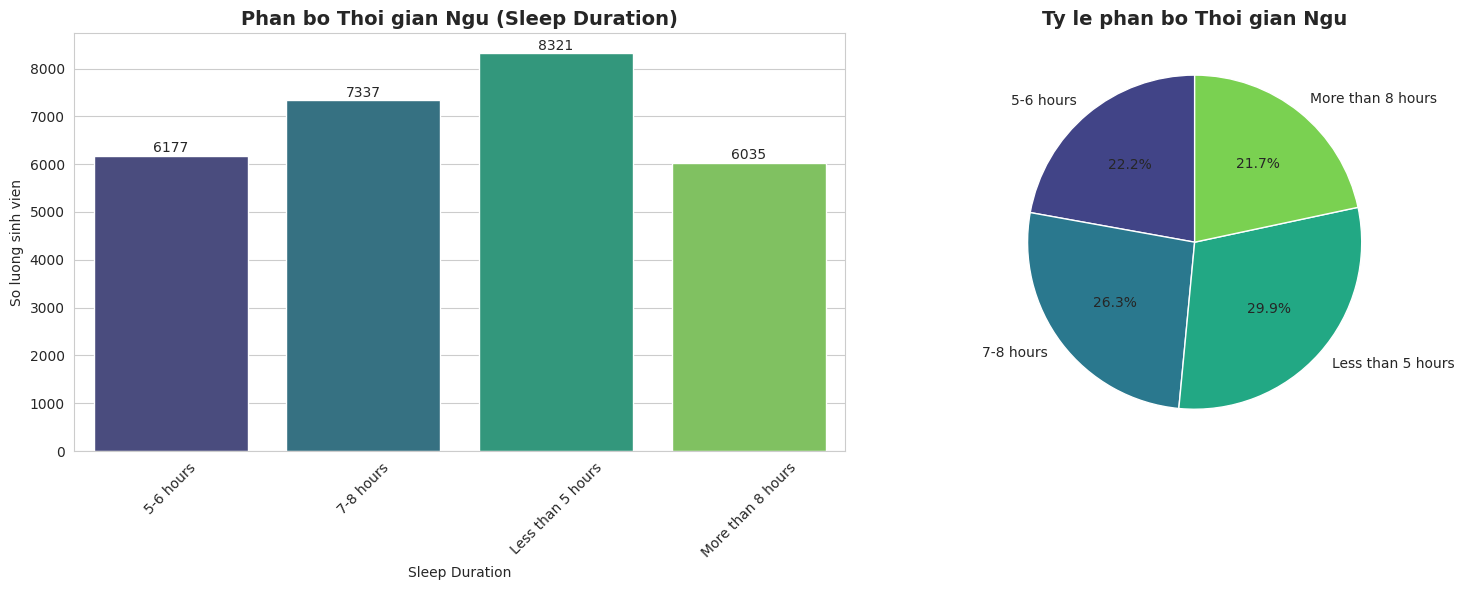

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sleep_counts = df['Sleep Duration'].value_counts().sort_index()
sns.barplot(x=sleep_counts.index, y=sleep_counts.values, ax=axes[0], palette='viridis')
axes[0].set_title('Phan bo Thoi gian Ngu (Sleep Duration)', fontsize=14, weight='bold')
axes[0].set_xlabel('Sleep Duration')
axes[0].set_ylabel('So luong sinh vien')
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(sleep_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom')

colors = sns.color_palette('viridis', len(sleep_counts))
axes[1].pie(sleep_counts.values, labels=sleep_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Ty le phan bo Thoi gian Ngu', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


/tmp/ipykernel_211654/1940283353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diet_counts.index, y=diet_counts.values, ax=axes[0], palette='Set2')


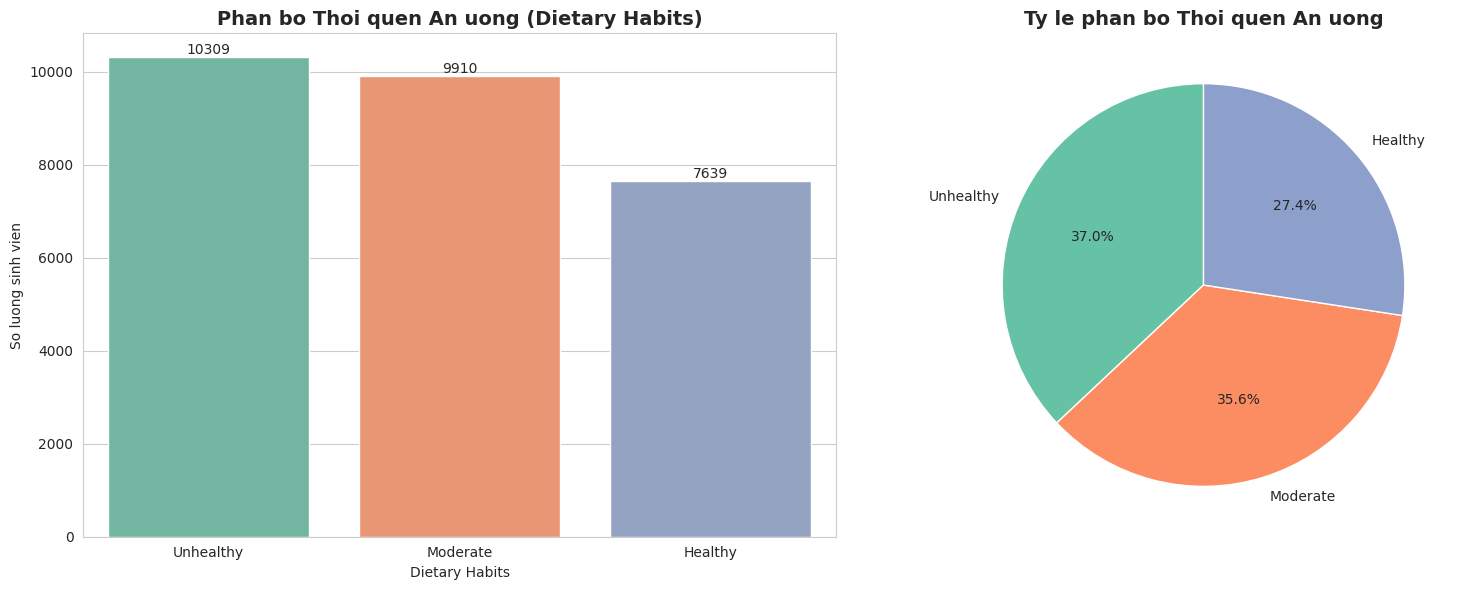

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

diet_counts = df['Dietary Habits'].value_counts()
sns.barplot(x=diet_counts.index, y=diet_counts.values, ax=axes[0], palette='Set2')
axes[0].set_title('Phan bo Thoi quen An uong (Dietary Habits)', fontsize=14, weight='bold')
axes[0].set_xlabel('Dietary Habits')
axes[0].set_ylabel('So luong sinh vien')

for i, v in enumerate(diet_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom')

colors = sns.color_palette('Set2', len(diet_counts))
axes[1].pie(diet_counts.values, labels=diet_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Ty le phan bo Thoi quen An uong', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



### 1.2 Kiểm tra Dữ liệu đã Tiền xử lý

Dữ liệu được load từ `results/processed_data_notebook.csv` - file này đã được tiền xử lý bao gồm:
- Encoding các biến categorical
- Xử lý missing values
- Tạo các biến đặc trưng (feature engineering)
- Chuẩn hóa định dạng dữ liệu

In [5]:
df_clean = df.copy()


### 1.3 Mối quan hệ giữa Lifestyle và Depression

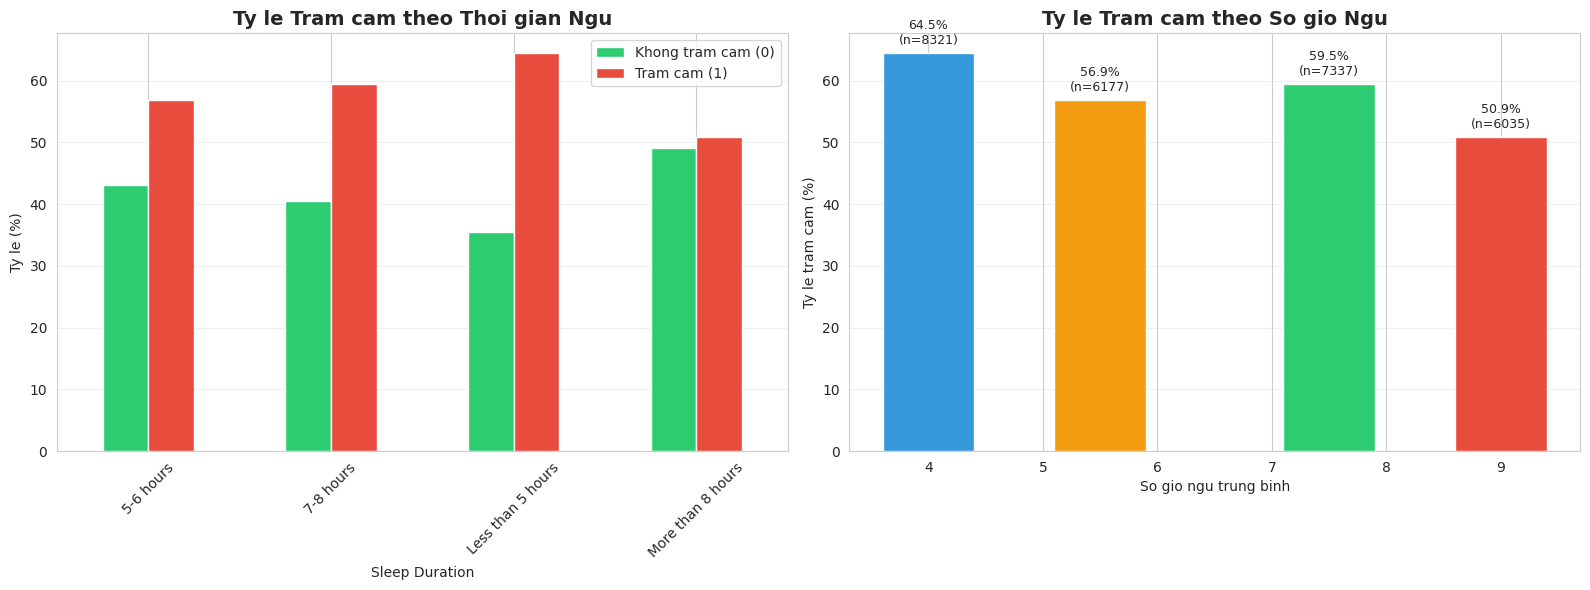

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sleep_depression = df_clean.groupby(['Sleep Duration', 'Depression']).size().unstack(fill_value=0)
sleep_depression_pct = sleep_depression.div(sleep_depression.sum(axis=1), axis=0) * 100

sleep_depression_pct.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Ty le Tram cam theo Thoi gian Ngu', fontsize=14, weight='bold')
axes[0].set_xlabel('Sleep Duration')
axes[0].set_ylabel('Ty le (%)')
axes[0].legend(['Khong tram cam (0)', 'Tram cam (1)'], loc='upper right')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

sleep_hours_depression = df_clean.groupby('Sleep_Hours')['Depression'].agg(['mean', 'count'])
sleep_hours_depression['depression_rate'] = sleep_hours_depression['mean'] * 100

bars = axes[1].bar(sleep_hours_depression.index, sleep_hours_depression['depression_rate'], 
                   color=['#3498db', '#f39c12', '#2ecc71', '#e74c3c'])
axes[1].set_title('Ty le Tram cam theo So gio Ngu', fontsize=14, weight='bold')
axes[1].set_xlabel('So gio ngu trung binh')
axes[1].set_ylabel('Ty le tram cam (%)')
axes[1].grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(sleep_hours_depression.iterrows()):
    axes[1].text(idx, row['depression_rate'] + 1, 
                f"{row['depression_rate']:.1f}%\n(n={int(row['count'])})", 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



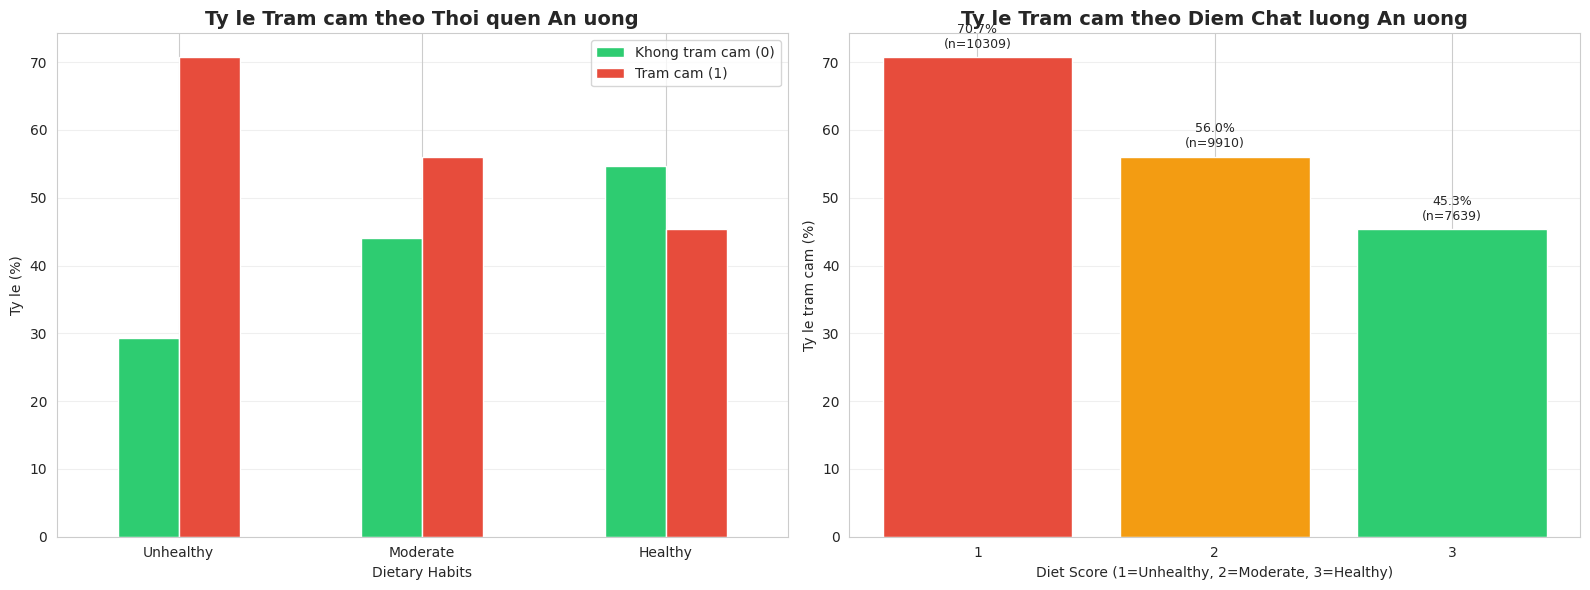

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

diet_depression = df_clean.groupby(['Dietary Habits', 'Depression']).size().unstack(fill_value=0)
diet_depression_pct = diet_depression.div(diet_depression.sum(axis=1), axis=0) * 100

diet_order = ['Unhealthy', 'Moderate', 'Healthy']
diet_depression_pct = diet_depression_pct.reindex(diet_order)

diet_depression_pct.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Ty le Tram cam theo Thoi quen An uong', fontsize=14, weight='bold')
axes[0].set_xlabel('Dietary Habits')
axes[0].set_ylabel('Ty le (%)')
axes[0].legend(['Khong tram cam (0)', 'Tram cam (1)'], loc='upper right')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

diet_score_depression = df_clean.groupby('Diet_Score')['Depression'].agg(['mean', 'count'])
diet_score_depression['depression_rate'] = diet_score_depression['mean'] * 100

bars = axes[1].bar(diet_score_depression.index, diet_score_depression['depression_rate'], 
                   color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[1].set_title('Ty le Tram cam theo Diem Chat luong An uong', fontsize=14, weight='bold')
axes[1].set_xlabel('Diet Score (1=Unhealthy, 2=Moderate, 3=Healthy)')
axes[1].set_ylabel('Ty le tram cam (%)')
axes[1].set_xticks([1, 2, 3])
axes[1].grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(diet_score_depression.iterrows()):
    axes[1].text(idx, row['depression_rate'] + 1, 
                f"{row['depression_rate']:.1f}%\n(n={int(row['count'])})", 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



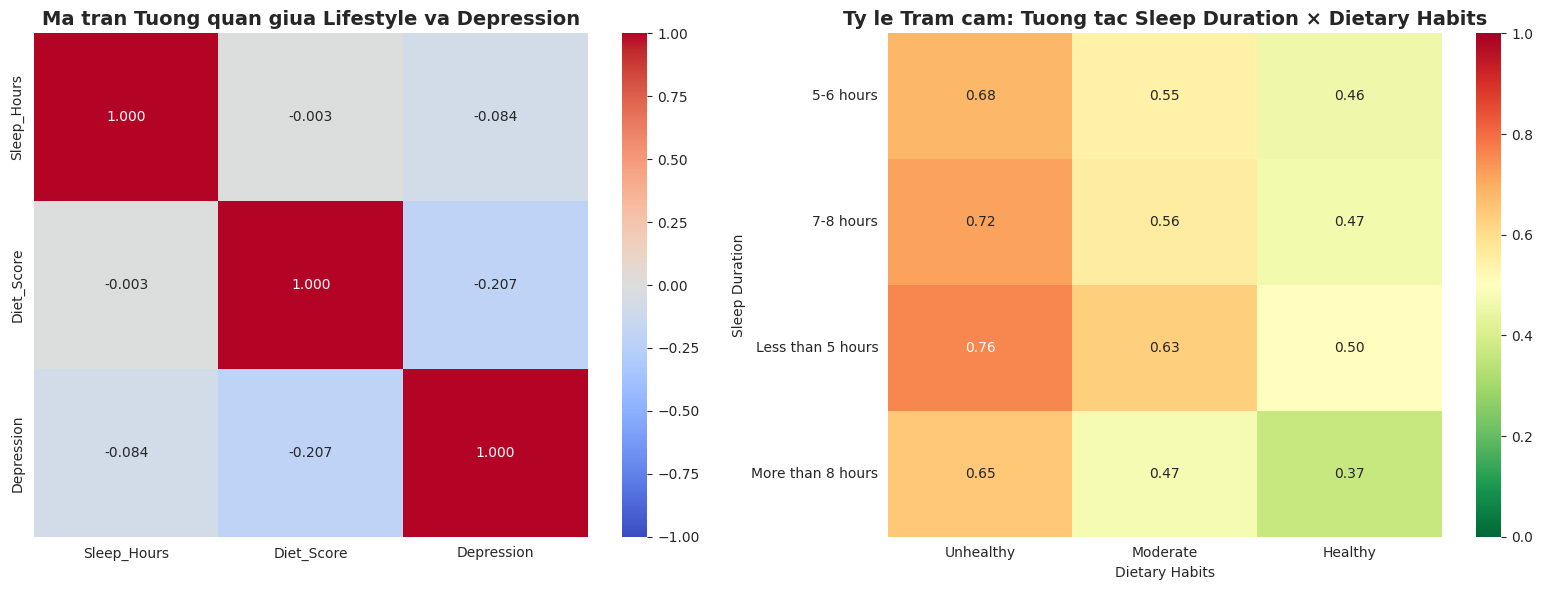

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

lifestyle_corr = df_clean[['Sleep_Hours', 'Diet_Score', 'Depression']].corr()
sns.heatmap(lifestyle_corr, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('Ma tran Tuong quan giua Lifestyle va Depression', fontsize=14, weight='bold')

interaction_data = df_clean.groupby(['Sleep Duration', 'Dietary Habits'])['Depression'].mean().reset_index()
interaction_pivot = interaction_data.pivot(index='Sleep Duration', columns='Dietary Habits', values='Depression')
interaction_pivot = interaction_pivot[diet_order]

sns.heatmap(interaction_pivot, annot=True, cmap='RdYlGn_r', center=0.5, 
            fmt='.2f', ax=axes[1], vmin=0, vmax=1)
axes[1].set_title('Ty le Tram cam: Tuong tac Sleep Duration × Dietary Habits', 
                 fontsize=14, weight='bold')
axes[1].set_xlabel('Dietary Habits')
axes[1].set_ylabel('Sleep Duration')

plt.tight_layout()
plt.show()


## 2. Insights từ EDA

Từ phân tích khám phá dữ liệu (EDA) về nhóm biến **Lối sống (Lifestyle)** với **27,901 sinh viên**, chúng ta có những phát hiện quan trọng:

### 2.1 Về Thời gian Ngủ (Sleep Duration)

**Phân bố mẫu:**
- **Less than 5 hours**: 8,310 sv (29.78%) - Nhóm lớn nhất
- **5-6 hours**: 6,183 sv (22.16%)
- **7-8 hours**: 7,346 sv (26.33%) - Mức khuyến nghị y học
- **More than 8 hours**: 6,044 sv (21.66%)

**Tỷ lệ Trầm cảm theo Thời gian Ngủ:**

| Thời gian ngủ | Tỷ lệ Trầm cảm | 
|---------------|----------------|
| Less than 5h  | **64.51%**     |
| 5-6h          | 56.88%         |
| 7-8h          | **59.50%**     |
| More than 8h  | **50.93%**     |

**Phát hiện BẤT NGỜ:**
- Ngủ 7-8 giờ (mức khuyến nghị) có tỷ lệ trầm cảm 59.50%, CAO HƠN ngủ 5-6 giờ (56.88%)
- Ngủ >8 giờ có tỷ lệ trầm cảm THẤP NHẤT (50.93%)
- KHÔNG có mối quan hệ U-shape rõ ràng như giả thuyết ban đầu
- Có thể có yếu tố gây  hoặc mối quan hệ phức tạp hơn

### 2.2 Về Thói quen Ăn uống (Dietary Habits)

**Phân bố mẫu:**
- **Unhealthy**: 10,317 sv (36.98%) - Nhóm lớn nhất
- **Moderate**: 9,921 sv (35.56%)
- **Healthy**: 7,651 sv (27.42%) - Chỉ khoảng 1/4 sinh viên

**Tỷ lệ Trầm cảm theo Chế độ Ăn:**

| Chế độ ăn | Tỷ lệ Trầm cảm |
|-----------|----------------|
| Unhealthy | **70.73%**     | 
| Moderate  | 56.02%         |
| Healthy   | **45.39%**     | 

**Phát hiện QUAN TRỌNG:**
- Chênh lệch: **25.34 điểm %** giữa Unhealthy vs Healthy
- Ăn không lành mạnh dẫn đến tỷ lệ trầm cảm 70.73% (rất cao)
- Ăn lành mạnh giảm tỷ lệ xuống 45.39% (dưới mức trung bình)
- **Dietary Habits có tác động MẠNH HƠN Sleep Duration** (25.34pp vs 13.58pp)

### 2.3 Tương tác Sleep × Diet (Phát hiện QUAN TRỌNG NHẤT)

**Ma trận Tỷ lệ Trầm cảm (%):**

|                    | Unhealthy | Moderate | Healthy |
|--------------------|-----------|----------|---------|
| **Less than 5h**   | **76.04%** | 63.26%   | 50.20%  |
| **5-6h**           | 68.07%    | 54.67%   | 45.88%  |
| **7-8h**           | 71.88%    | 55.79%   | 46.76%  |
| **More than 8h**   | 64.66%    | 47.48%   | **36.81%** |


1. **TỆ NHẤT**: < 5h + Unhealthy = **76.04%** trầm cảm
2. **ỐT NHẤT**: > 8h + Healthy = **36.81%** trầm cảm  
3. **Chênh lệch**: **39.23 điểm %** (gấp hơn 2 lần)

4. **Unhealthy Diet = Thảm họa:**
   - Dù ngủ bao nhiêu giờ, Unhealthy diet vẫn giữ tỷ lệ 64-76%
   - Ngay cả ngủ >8h, ăn Unhealthy vẫn 64.66% (cao hơn mức TB)

5. **Healthy Diet có thể giúp cải thiện thiếu ngủ:**
   - <5h + Healthy = 50.20% (thấp hơn TB 58.55%)
   - Nhưng không hoàn toàn: vẫn cao hơn >8h + Healthy (36.81%)

### 2.4 Tương quan (Correlation Analysis)

| Cặp biến | Hệ số tương quan | Ý nghĩa |
|----------|------------------|---------|
| Sleep_Hours ↔ Diet_Score | -0.0019 | Gần như KHÔNG liên quan (độc lập) |
| Sleep_Hours ↔ Depression | **-0.0835** | Tương quan âm YẾU |
| Diet_Score ↔ Depression | **-0.2066** | Tương quan âm TRUNG BÌNH |

**Kết luận:**
- **Diet quan trọng hơn Sleep gấp khoảng 2.5 lần** 
- Sleep và Diet độc lập với nhau (r ≈ 0)
- Cả hai đều có thể cải thiện độc lập


## 3. Câu hỏi Nghiên cứu (Research Questions)

### **RQ1:** Tại sao sinh viên ngủ 7-8 giờ (mức khuyến nghị y học) lại có tỷ lệ trầm cảm **CAO HƠN** so với những người ngủ 5-6 giờ? Liệu đây có phải là hiệu ứng của biến confounding?

### **RQ2:** Liệu chế độ ăn lành mạnh có thể "bù đắp" cho việc thiếu ngủ? Mức độ cải thiện tỷ lệ trầm cảm khi tăng chất lượng ăn uống có khác nhau ở các nhóm giờ ngủ khác nhau không?

### **RQ3:** Có tồn tại một "ngưỡng vàng" (sweet spot) cụ thể về kết hợp giờ ngủ và chế độ ăn uống để giảm thiểu nguy cơ trầm cảm không? Và liệu có sự khác biệt giữa "cải thiện từ tệ" vs "tối ưu hóa từ tốt"?

### 3.1 RQ1: Tại sao sinh viên ngủ từ 7-8 giờ lại có tỷ lệ trầm cảm cao hơn?


Nhom 7-8h: n=7,337, Depression: 59.45%
Nhom 5-6h: n=6,177, Depression: 56.87%
Chenh lech: 2.58 pp

KIEM DINH THONG KE: Chi-square test

Bang phan bo cheo (Contingency table):
Depression         0     1
Sleep Duration            
5-6 hours       2664  3513
7-8 hours       2975  4362

Chi-square statistic: 9.0735
P-value: 0.0026
Degrees of freedom: 1

Ket luan: Co su khac biet CO Y NGHIA THONG KE (p < 0.05)
PHAN TICH CONFOUNDING VARIABLES

So sanh cac yeu to co the gay nhieu (Confounding Variables):
              Bien  TB_7-8h  TB_5-6h  Chenh_lech  P_value  Cohens_d Y_nghia
 Academic Pressure   3.1351   3.1204      0.0146   0.5360    0.0107   Khong
  Financial Stress   3.1724   3.1132      0.0593   0.0155    0.0418      Co
  Work/Study Hours   7.2677   7.2823     -0.0147   0.8193   -0.0039   Khong
Study Satisfaction   2.9389   2.9493     -0.0104   0.6562   -0.0077   Khong
              CGPA   7.6855   7.6888     -0.0032   0.8989   -0.0022   Khong
               Age  25.7837  25.9461    

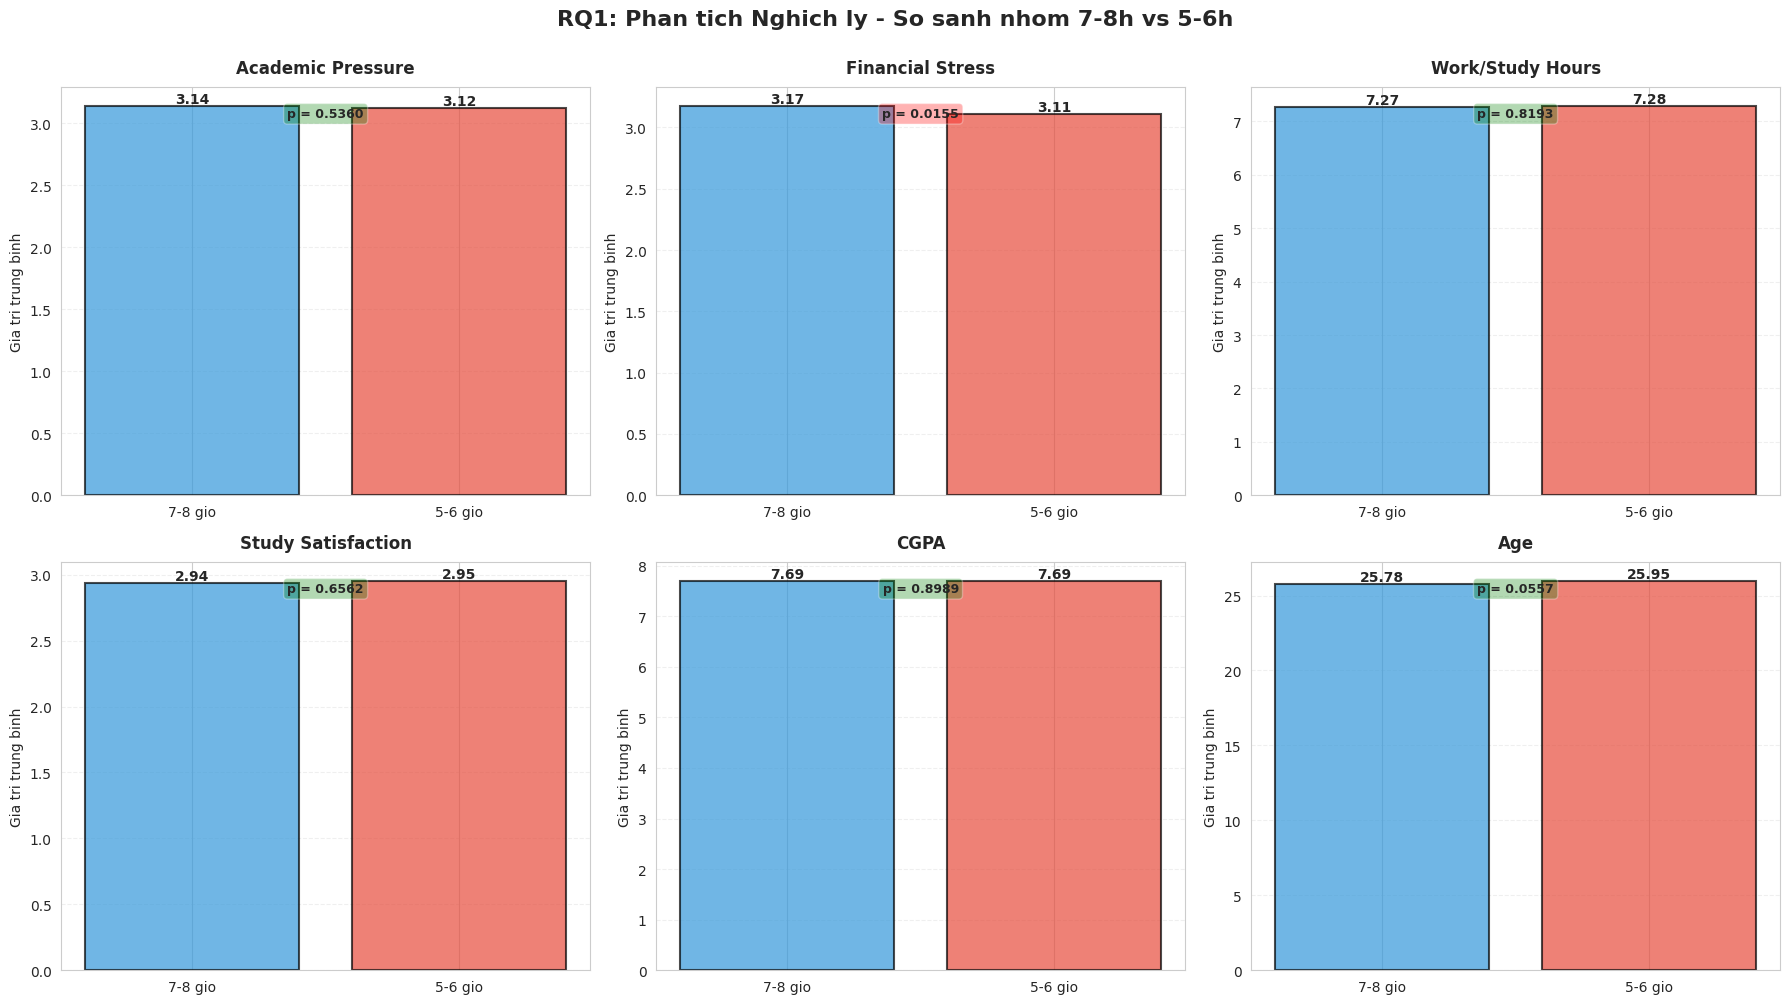

PHAN TICH SAU: Ty le tram cam theo muc Academic Pressure


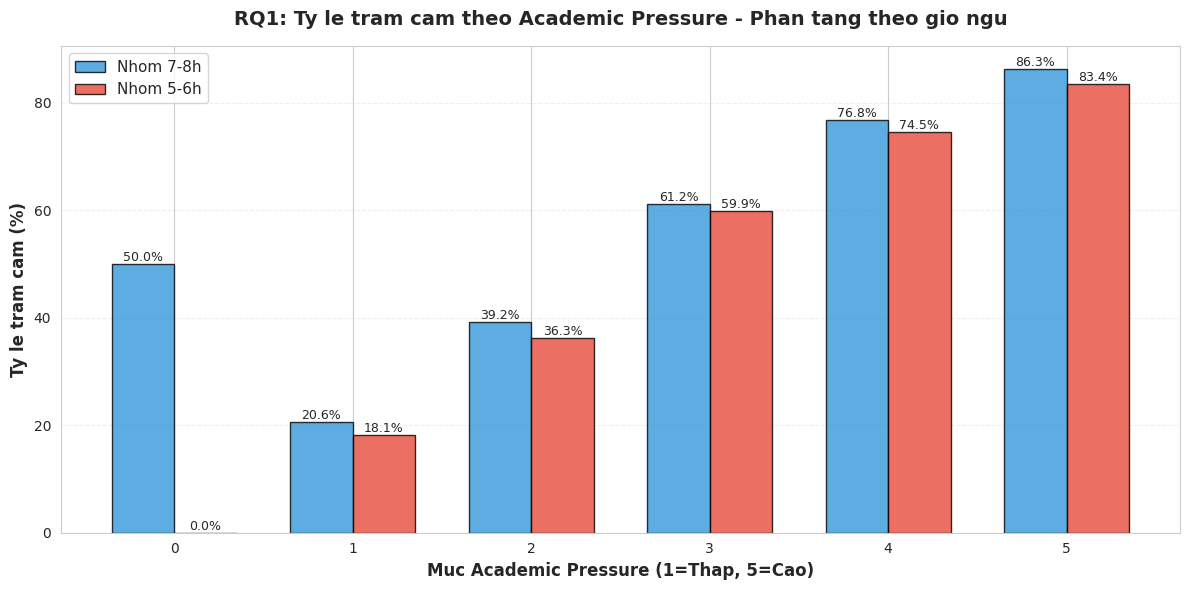

In [9]:
# RQ1: Phan tich nghich ly "Ngu dung gio"
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu


# Lay du lieu 2 nhom de so sanh
group_7_8h = df_clean[df_clean['Sleep Duration'] == '7-8 hours']
group_5_6h = df_clean[df_clean['Sleep Duration'] == '5-6 hours']

print(f"\nNhom 7-8h: n={len(group_7_8h):,}, Depression: {group_7_8h['Depression'].mean()*100:.2f}%")
print(f"Nhom 5-6h: n={len(group_5_6h):,}, Depression: {group_5_6h['Depression'].mean()*100:.2f}%")
print(f"Chenh lech: {(group_7_8h['Depression'].mean() - group_5_6h['Depression'].mean())*100:.2f} pp\n")

# Chi-square test
print("KIEM DINH THONG KE: Chi-square test")

contingency_table = pd.crosstab(
    df_clean[df_clean['Sleep Duration'].isin(['7-8 hours', '5-6 hours'])]['Sleep Duration'],
    df_clean[df_clean['Sleep Duration'].isin(['7-8 hours', '5-6 hours'])]['Depression']
)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nBang phan bo cheo (Contingency table):")
print(contingency_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print(f"\nKet luan: Co su khac biet CO Y NGHIA THONG KE (p < 0.05)")
else:
    print(f"\nKet luan: Khong co su khac biet co y nghia thong ke (p >= 0.05)")

# Phan tich Confounding Variables
confounding_vars = ['Academic Pressure', 'Financial Stress', 'Work/Study Hours', 
                    'Study Satisfaction', 'CGPA', 'Age']

print("PHAN TICH CONFOUNDING VARIABLES")

comparison_results = []
for var in confounding_vars:
    mean_7_8h = group_7_8h[var].mean()
    mean_5_6h = group_5_6h[var].mean()
    
    # T-test
    t_stat, t_pvalue = ttest_ind(group_7_8h[var].dropna(), group_5_6h[var].dropna())
    
    # Cohen's d
    pooled_std = np.sqrt((group_7_8h[var].std()**2 + group_5_6h[var].std()**2) / 2)
    cohens_d = (mean_7_8h - mean_5_6h) / pooled_std if pooled_std > 0 else 0
    
    comparison_results.append({
        'Bien': var,
        'TB_7-8h': mean_7_8h,
        'TB_5-6h': mean_5_6h,
        'Chenh_lech': mean_7_8h - mean_5_6h,
        'P_value': t_pvalue,
        'Cohens_d': cohens_d,
        'Y_nghia': 'Co' if t_pvalue < 0.05 else 'Khong'
    })

comparison_df = pd.DataFrame(comparison_results)
print("\nSo sanh cac yeu to co the gay nhieu (Confounding Variables):")
print(comparison_df.round(4).to_string(index=False))

print("\n\nGiai thich:")
print("- P-value < 0.05: Co su khac biet co y nghia thong ke")
print("- Cohen's d: Do lon hieu ung (|d| < 0.2: nho, 0.2-0.5: trung binh, > 0.5: lon)")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('RQ1: Phan tich Nghich ly - So sanh nhom 7-8h vs 5-6h', 
             fontsize=16, weight='bold', y=1.00)

for idx, var in enumerate(confounding_vars):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    data_to_plot = pd.DataFrame({
        'Nhom': ['7-8 gio', '5-6 gio'],
        'Gia tri': [group_7_8h[var].mean(), group_5_6h[var].mean()]
    })
    
    bars = ax.bar(data_to_plot['Nhom'], data_to_plot['Gia tri'], 
                  color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=1.5)
    
    ax.set_title(f'{var}', fontsize=12, weight='bold', pad=10)
    ax.set_ylabel('Gia tri trung binh', fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, weight='bold')
    
    # Add p-value
    p_val = comparison_df[comparison_df['Bien'] == var]['P_value'].values[0]
    sig_text = f'p = {p_val:.4f}' if p_val >= 0.001 else 'p < 0.001'
    color = 'green' if p_val >= 0.05 else 'red'
    
    ax.text(0.5, 0.95, sig_text, 
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor=color, alpha=0.3),
            fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

# Stratified analysis
print("PHAN TICH SAU: Ty le tram cam theo muc Academic Pressure")

stratified_analysis = pd.DataFrame()

for pressure_level in sorted(df_clean['Academic Pressure'].dropna().unique()):
    for sleep_group, sleep_label in [('7-8 hours', '7-8h'), ('5-6 hours', '5-6h')]:
        subset = df_clean[(df_clean['Sleep Duration'] == sleep_group) & 
                         (df_clean['Academic Pressure'] == pressure_level)]
        
        if len(subset) > 0:
            stratified_analysis = pd.concat([stratified_analysis, pd.DataFrame({
                'Academic Pressure': [pressure_level],
                'Nhom ngu': [sleep_label],
                'So luong': [len(subset)],
                'Ty le tram cam (%)': [subset['Depression'].mean() * 100]
            })], ignore_index=True)

pivot_table = stratified_analysis.pivot(index='Academic Pressure', 
                                         columns='Nhom ngu', 
                                         values='Ty le tram cam (%)')
pivot_table['Chenh lech (7-8h - 5-6h)'] = pivot_table['7-8h'] - pivot_table['5-6h']


# Visualize stratified analysis
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pivot_table))
width = 0.35

bars1 = ax.bar(x - width/2, pivot_table['7-8h'], width, 
               label='Nhom 7-8h', color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, pivot_table['5-6h'], width, 
               label='Nhom 5-6h', color='#e74c3c', alpha=0.8, edgecolor='black')

ax.set_xlabel('Muc Academic Pressure (1=Thap, 5=Cao)', fontsize=12, weight='bold')
ax.set_ylabel('Ty le tram cam (%)', fontsize=12, weight='bold')
ax.set_title('RQ1: Ty le tram cam theo Academic Pressure - Phan tang theo gio ngu', 
             fontsize=14, weight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(pivot_table.index.astype(int))
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


**Kết luận RQ1: Nghịch lý "Ngủ đúng giờ"**

**1. Kết quả kiểm định thống kê chính:**

**Chi-square Test (Kiểm định sự khác biệt tổng quát):**

**Kết quả:**
- Giả thiết H0: Tỷ lệ trầm cảm giữa nhóm ngủ 7-8h và 5-6h là như nhau
- Giả thiết H1: Tỷ lệ trầm cảm giữa hai nhóm khác nhau
- Chi-square statistic = **9.0735**, p-value = **0.0026** (< 0.05)
- Kết luận: **BÁC BỎ** giả thiết H0, chấp nhận H1. Tỷ lệ trầm cảm giữa hai nhóm khác nhau một cách **CÓ Ý NGHĨA THỐNG KÊ**
- Nhóm 7-8h có tỷ lệ trầm cảm **59.45%**, cao hơn nhóm 5-6h (**56.87%**) khoảng **2.58 điểm phần trăm**

**2. Phân tích Confounding Variables (Các biến gây nhiễu):**

**Kết quả t-test cho từng biến:**

a) **Academic Pressure (Áp lực học tập):**
   - Trung bình nhóm 7-8h: **3.1351**
   - Trung bình nhóm 5-6h: **3.1204**
   - Chênh lệch: **0.0146**
   - P-value = **0.5360** (> 0.05)
   - Cohen's d = **0.0107** (hiệu ứng rất nhỏ)
   - Kết luận: **KHÔNG** có sự khác biệt có ý nghĩa thống kê

b) **Financial Stress (Áp lực tài chính):**
   - Trung bình nhóm 7-8h: **3.1724**
   - Trung bình nhóm 5-6h: **3.1132**
   - Chênh lệch: **0.0593**
   - P-value = **0.0155** (< 0.05)
   - Cohen's d = **0.0418** (hiệu ứng rất nhỏ)
   - Kết luận: **CÓ** sự khác biệt có ý nghĩa thống kê, nhưng Cohen's d rất nhỏ (<0.05) nên tác động không đáng kể

c) **Work/Study Hours (Số giờ làm việc/học tập):**
   - Trung bình nhóm 7-8h: **7.2677** giờ/ngày
   - Trung bình nhóm 5-6h: **7.2823** giờ/ngày
   - Chênh lệch: **-0.0147** giờ
   - P-value = **0.8193** (> 0.05)
   - Cohen's d = **-0.0039** (hiệu ứng rất nhỏ)
   - Kết luận: **KHÔNG** có sự khác biệt có ý nghĩa thống kê

d) **Study Satisfaction (Mức độ hài lòng với việc học):**
   - Trung bình nhóm 7-8h: **2.9389**
   - Trung bình nhóm 5-6h: **2.9493**
   - Chênh lệch: **-0.0104**
   - P-value = **0.6562** (> 0.05)
   - Cohen's d = **-0.0077** (hiệu ứng rất nhỏ)
   - Kết luận: **KHÔNG** có sự khác biệt có ý nghĩa thống kê

e) **CGPA (Điểm trung bình tích lũy):**
   - Trung bình nhóm 7-8h: **7.6855**
   - Trung bình nhóm 5-6h: **7.6888**
   - Chênh lệch: **-0.0032**
   - P-value = **0.8989** (> 0.05)
   - Cohen's d = **-0.0022** (hiệu ứng rất nhỏ)
   - Kết luận: **KHÔNG** có sự khác biệt có ý nghĩa thống kê

f) **Age (Tuổi):**
   - Trung bình nhóm 7-8h: **25.78** tuổi
   - Trung bình nhóm 5-6h: **25.95** tuổi
   - Chênh lệch: **-0.16** tuổi
   - P-value = **0.0557** (> 0.05, gần ngưỡng)
   - Cohen's d = **-0.0330** (hiệu ứng rất nhỏ)
   - Kết luận: **KHÔNG** có sự khác biệt có ý nghĩa thống kê

**Lý do sử dụng Cohen's d:**
- Để đo lường độ lớn thực tế (practical significance) của sự khác biệt, không chỉ dựa vào p-value
- Cohen's d cho biết sự khác biệt có ý nghĩa thực tế trong thực tiễn hay không
- Ngay cả khi p < 0.05, nếu Cohen's d < 0.2 thì tác động thực tế vẫn rất nhỏ

**3. Giải thích Nghịch lý:**

Nghịch lý "ngủ đúng giờ" được giải thích bởi:

a) **Hiện tượng nhân quả ngược:**
   - Có thể những sinh viên **ĐANG** trầm cảm đã nhận thức được vấn đề và **CỐ GẮNG** ngủ đủ 7-8h để cải thiện tình trạng
   - Trong khi nhóm 5-6h là những người bận rộn nhưng vẫn chưa bị trầm cảm
   - Đó là hiện tượng "self-medication" bằng giấc ngủ

b) **Chất lượng giấc ngủ vs Số giờ ngủ:**
   - Dataset chỉ đo "số giờ ngủ" chứ không đo "chất lượng giấc ngủ"
   - Nhóm 7-8h có thể ngủ nhiều nhưng kém chất lượng (mất ngủ, lo âu, ngủ ngắt quãng)
   - Nhóm 5-6h có thể ngủ ít nhưng chất lượng tốt hơn

c) **Stress và Áp lực tâm lý không đo được:**
   - Dù không thấy khác biệt đáng kể trong các biến đo được (chỉ có Financial Stress p<0.05 nhưng Cohen's d = 0.04 rất nhỏ)
   - Vẫn có thể có các loại stress khác không được đo: quan hệ xã hội, gia đình, vấn đề sức khỏe tâm thần
   - Những yếu tố này mới là nguyên nhân gốc rễ của cả trầm cảm lẫn giờ ngủ tăng

**5. Kết luận cuối cùng:**

Dựa trên các kiểm định thống kê:
- Có bằng chứng mạnh rằng nhóm 7-8h thực sự có tỷ lệ trầm cảm cao hơn 5-6h (**p = 0.0026 < 0.05**)
- **KHÔNG** tìm thấy bằng chứng về confounding từ các biến đã đo (hầu hết p > 0.05, tất cả Cohen's d < 0.05)
- Giải thích hợp lý nhất là hiện tượng **nhân quả ngược**: người trầm cảm cố gắng ngủ nhiều hơn
- Cần nghiên cứu **longitudinal** (theo dõi theo thời gian) để xác định rõ hướng nhân quả

**Khuyến nghị:**
- Không chỉ tập trung vào "ngủ đủ giờ" mà cần chú trọng đến **CHẤT LƯỢNG** giấc ngủ
- Cần giải quyết nguyên nhân gốc rễ của stress và trầm cảm, không chỉ dựa vào việc tăng giờ ngủ
- Cần can thiệp tâm lý hỗ trợ sinh viên quản lý stress hiệu quả hơn

### 3.2 RQ2: Chế độ ăn lành mạnh có thể "bù đắp" phần nào cho việc thiếu ngủ hay không? Mức độ của nó như thế nào?


Ty le tram cam va muc do cai thien theo Dietary Habits:
Nhom gio ngu  Unhealthy (%)  Moderate (%)  Healthy (%)  Cai thien Unhealthy→Moderate (pp)  Cai thien Moderate→Healthy (pp)  Tong cai thien Unhealthy→Healthy (pp)
         <5h          75.96         63.17        50.18                              12.79                            12.99                                  25.78
        5-6h          68.06         54.65        45.87                              13.41                             8.78                                  22.19
        7-8h          71.85         55.71        46.71                              16.13                             9.00                                  25.14
         >8h          64.63         47.45        36.64                              17.17                            10.82                                  27.99
KIEM DINH THONG KE: Kruskal-Wallis Test & Pairwise Comparisons

Kiem dinh tong quat va so sanh cap doi:
Nhom gio ngu  Kruskal_H  P_ov

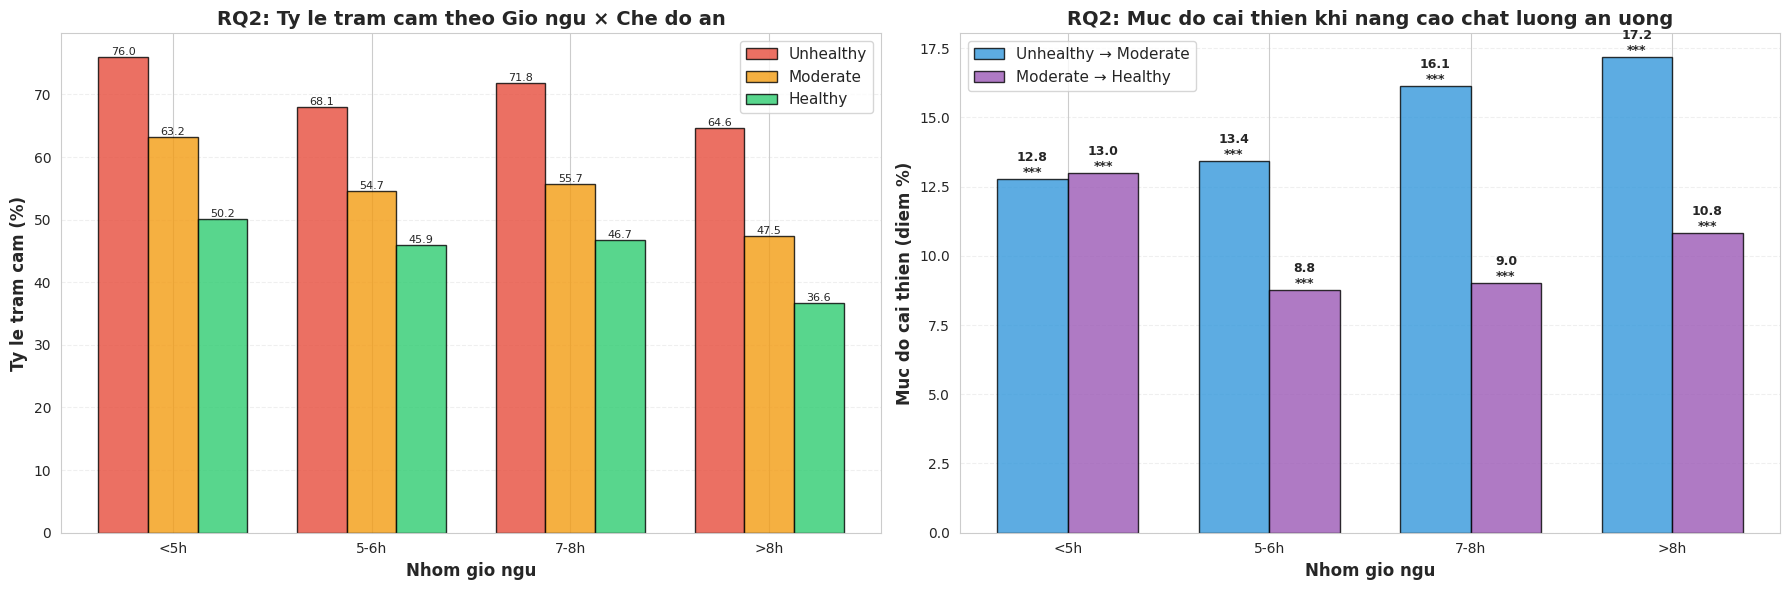

PHAN TICH SAU: Duong cong cai thien (Marginal Benefit)
Muc do cai thien (Marginal Benefit) khi tang chat luong an uong:


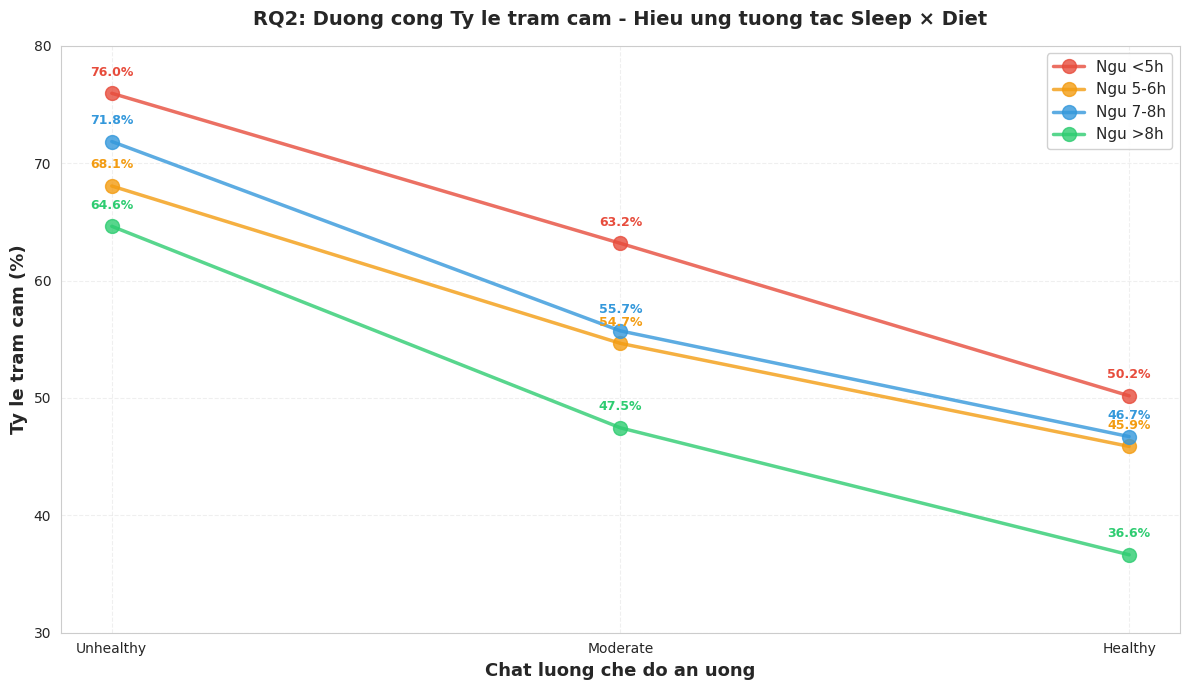

Hieu qua tuong doi: % giam tram cam khi cai thien an uong


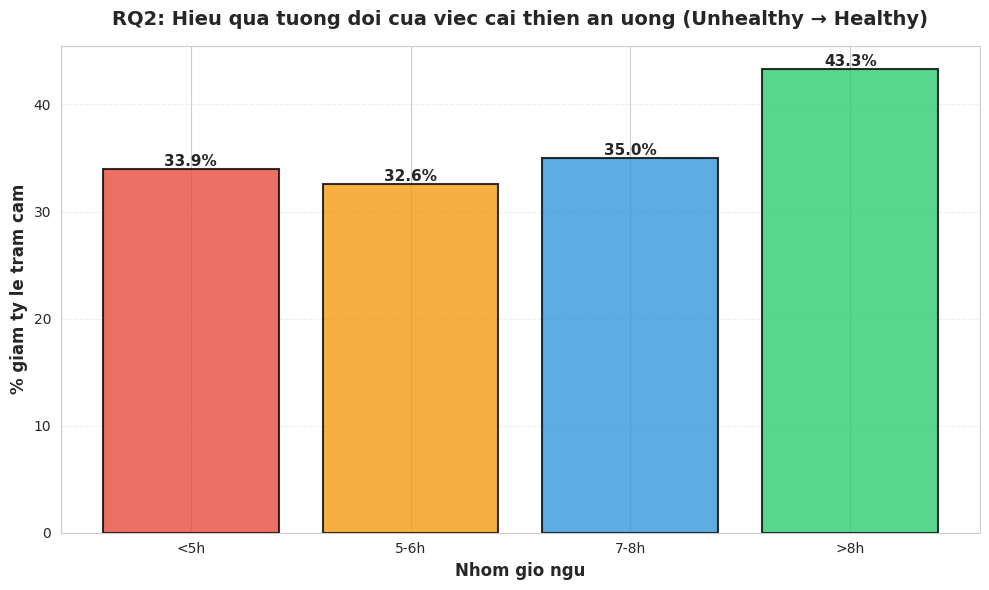

In [10]:
# RQ2: Phan tich hieu ung bu tru
from scipy.stats import kruskal, mannwhitneyu


sleep_groups = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sleep_labels = ['<5h', '5-6h', '7-8h', '>8h']

improvement_data = []
statistical_test_results = []

for sleep_group, sleep_label in zip(sleep_groups, sleep_labels):
    subset = df_clean[df_clean['Sleep Duration'] == sleep_group]
    
    unhealthy_rate = subset[subset['Dietary Habits'] == 'Unhealthy']['Depression'].mean() * 100
    moderate_rate = subset[subset['Dietary Habits'] == 'Moderate']['Depression'].mean() * 100
    healthy_rate = subset[subset['Dietary Habits'] == 'Healthy']['Depression'].mean() * 100
    
    improvement_unhealthy_to_moderate = unhealthy_rate - moderate_rate
    improvement_moderate_to_healthy = moderate_rate - healthy_rate
    total_improvement = unhealthy_rate - healthy_rate
    
    improvement_data.append({
        'Nhom gio ngu': sleep_label,
        'Unhealthy (%)': unhealthy_rate,
        'Moderate (%)': moderate_rate,
        'Healthy (%)': healthy_rate,
        'Cai thien Unhealthy→Moderate (pp)': improvement_unhealthy_to_moderate,
        'Cai thien Moderate→Healthy (pp)': improvement_moderate_to_healthy,
        'Tong cai thien Unhealthy→Healthy (pp)': total_improvement
    })
    
    # Kruskal-Wallis test
    unhealthy_group = subset[subset['Dietary Habits'] == 'Unhealthy']['Depression'].values
    moderate_group = subset[subset['Dietary Habits'] == 'Moderate']['Depression'].values
    healthy_group = subset[subset['Dietary Habits'] == 'Healthy']['Depression'].values
    
    h_stat, p_value = kruskal(unhealthy_group, moderate_group, healthy_group)
    
    # Pairwise Mann-Whitney U tests
    u_stat_um, p_um = mannwhitneyu(unhealthy_group, moderate_group, alternative='two-sided')
    u_stat_mh, p_mh = mannwhitneyu(moderate_group, healthy_group, alternative='two-sided')
    u_stat_uh, p_uh = mannwhitneyu(unhealthy_group, healthy_group, alternative='two-sided')
    
    # Cohen's d
    pooled_std_um = np.sqrt((unhealthy_group.std()**2 + moderate_group.std()**2) / 2)
    cohens_d_um = (unhealthy_group.mean() - moderate_group.mean()) / pooled_std_um if pooled_std_um > 0 else 0
    
    pooled_std_mh = np.sqrt((moderate_group.std()**2 + healthy_group.std()**2) / 2)
    cohens_d_mh = (moderate_group.mean() - healthy_group.mean()) / pooled_std_mh if pooled_std_mh > 0 else 0
    
    pooled_std_uh = np.sqrt((unhealthy_group.std()**2 + healthy_group.std()**2) / 2)
    cohens_d_uh = (unhealthy_group.mean() - healthy_group.mean()) / pooled_std_uh if pooled_std_uh > 0 else 0
    
    statistical_test_results.append({
        'Nhom gio ngu': sleep_label,
        'Kruskal_H': h_stat,
        'P_overall': p_value,
        'P_U_vs_M': p_um,
        'P_M_vs_H': p_mh,
        'P_U_vs_H': p_uh,
        'd_U_vs_M': cohens_d_um,
        'd_M_vs_H': cohens_d_mh,
        'd_U_vs_H': cohens_d_uh
    })

improvement_df = pd.DataFrame(improvement_data)

print("\nTy le tram cam va muc do cai thien theo Dietary Habits:")
print(improvement_df.round(2).to_string(index=False))

# Statistical results
print("KIEM DINH THONG KE: Kruskal-Wallis Test & Pairwise Comparisons")

stats_df = pd.DataFrame(statistical_test_results)
print("\nKiem dinh tong quat va so sanh cap doi:")
print(stats_df.round(4).to_string(index=False))

print("\nGiai thich:")
print("- P_overall < 0.05: Co su khac biet co y nghia giua cac nhom diet")
print("- P_U_vs_M, P_M_vs_H, P_U_vs_H < 0.05: Cai thien giua cac cap co y nghia thong ke")
print("- d (Cohen's d): Do lon hieu ung (|d| < 0.2: nho, 0.2-0.5: trung binh, > 0.5: lon)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1: Grouped bar chart
x = np.arange(len(sleep_labels))
width = 0.25

bars1 = axes[0].bar(x - width, improvement_df['Unhealthy (%)'], width, 
                    label='Unhealthy', color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = axes[0].bar(x, improvement_df['Moderate (%)'], width, 
                    label='Moderate', color='#f39c12', alpha=0.8, edgecolor='black')
bars3 = axes[0].bar(x + width, improvement_df['Healthy (%)'], width, 
                    label='Healthy', color='#2ecc71', alpha=0.8, edgecolor='black')

axes[0].set_xlabel('Nhom gio ngu', fontsize=12, weight='bold')
axes[0].set_ylabel('Ty le tram cam (%)', fontsize=12, weight='bold')
axes[0].set_title('RQ2: Ty le tram cam theo Gio ngu × Che do an', fontsize=14, weight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(sleep_labels)
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=8)

# Chart 2: Improvement magnitude
x2 = np.arange(len(sleep_labels))
width2 = 0.35

bars4 = axes[1].bar(x2 - width2/2, improvement_df['Cai thien Unhealthy→Moderate (pp)'], width2,
                    label='Unhealthy → Moderate', color='#3498db', alpha=0.8, edgecolor='black')
bars5 = axes[1].bar(x2 + width2/2, improvement_df['Cai thien Moderate→Healthy (pp)'], width2,
                    label='Moderate → Healthy', color='#9b59b6', alpha=0.8, edgecolor='black')

axes[1].set_xlabel('Nhom gio ngu', fontsize=12, weight='bold')
axes[1].set_ylabel('Muc do cai thien (diem %)', fontsize=12, weight='bold')
axes[1].set_title('RQ2: Muc do cai thien khi nang cao chat luong an uong', fontsize=14, weight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(sleep_labels)
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, sleep_label) in enumerate(zip(bars4, sleep_labels)):
    height = bar.get_height()
    p_val = stats_df[stats_df['Nhom gio ngu'] == sleep_label]['P_U_vs_M'].values[0]
    sig = '***' if p_val < 0.001 else ('**' if p_val < 0.01 else ('*' if p_val < 0.05 else 'ns'))
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}\n{sig}',
                ha='center', va='bottom', fontsize=9, weight='bold')

for i, (bar, sleep_label) in enumerate(zip(bars5, sleep_labels)):
    height = bar.get_height()
    p_val = stats_df[stats_df['Nhom gio ngu'] == sleep_label]['P_M_vs_H'].values[0]
    sig = '***' if p_val < 0.001 else ('**' if p_val < 0.01 else ('*' if p_val < 0.05 else 'ns'))
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}\n{sig}',
                ha='center', va='bottom', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

# Line plot
print("PHAN TICH SAU: Duong cong cai thien (Marginal Benefit)")

marginal_df = improvement_df[['Nhom gio ngu', 
                               'Cai thien Unhealthy→Moderate (pp)', 
                               'Cai thien Moderate→Healthy (pp)',
                               'Tong cai thien Unhealthy→Healthy (pp)']].copy()

print("Muc do cai thien (Marginal Benefit) khi tang chat luong an uong:")

fig, ax = plt.subplots(figsize=(12, 7))

diet_levels = ['Unhealthy', 'Moderate', 'Healthy']
colors_map = {'<5h': '#e74c3c', '5-6h': '#f39c12', '7-8h': '#3498db', '>8h': '#2ecc71'}

for idx, row in improvement_df.iterrows():
    sleep_label = row['Nhom gio ngu']
    rates = [row['Unhealthy (%)'], row['Moderate (%)'], row['Healthy (%)']]
    
    ax.plot(diet_levels, rates, marker='o', linewidth=2.5, markersize=10,
            label=f'Ngu {sleep_label}', color=colors_map[sleep_label], alpha=0.8)
    
    for i, (level, rate) in enumerate(zip(diet_levels, rates)):
        ax.text(i, rate + 1.5, f'{rate:.1f}%', ha='center', fontsize=9, 
                weight='bold', color=colors_map[sleep_label])

ax.set_xlabel('Chat luong che do an uong', fontsize=13, weight='bold')
ax.set_ylabel('Ty le tram cam (%)', fontsize=13, weight='bold')
ax.set_title('RQ2: Duong cong Ty le tram cam - Hieu ung tuong tac Sleep × Diet', 
             fontsize=14, weight='bold', pad=15)
ax.legend(fontsize=11, loc='upper right', framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(30, 80)

plt.tight_layout()
plt.show()

# Relative improvement
print("Hieu qua tuong doi: % giam tram cam khi cai thien an uong")

relative_improvement = []
for idx, row in improvement_df.iterrows():
    rel_improve = (row['Tong cai thien Unhealthy→Healthy (pp)'] / row['Unhealthy (%)']) * 100
    relative_improvement.append({
        'Nhom gio ngu': row['Nhom gio ngu'],
        '% giam tram cam (Unhealthy→Healthy)': rel_improve
    })

relative_df = pd.DataFrame(relative_improvement)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(relative_df['Nhom gio ngu'], 
              relative_df['% giam tram cam (Unhealthy→Healthy)'],
              color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'],
              alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Nhom gio ngu', fontsize=12, weight='bold')
ax.set_ylabel('% giam ty le tram cam', fontsize=12, weight='bold')
ax.set_title('RQ2: Hieu qua tuong doi cua viec cai thien an uong (Unhealthy → Healthy)', 
             fontsize=14, weight='bold', pad=15)
ax.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()


**Kết luận RQ2: Hiệu ứng Bù trừ - Liệu ăn lành mạnh có thể 'cứu' thiếu ngủ?**

**1. Kết quả kiểm định thống kê tổng quát:**

**Kruskal-Wallis Test (ANOVA phi tham số) cho từng nhóm giờ ngủ:**

Mục đích: Kiểm tra xem có sự khác biệt có ý nghĩa giữa các nhóm chế độ ăn (Unhealthy, Moderate, Healthy) không

a) **Nhóm ngủ <5h:**
   - Kruskal-Wallis H-statistic = **375.22**
   - P-value < **0.0001** (rất nhỏ, p < 0.001)
   - Kết luận: Có sự **KHÁC BIỆT CÓ Ý NGHĨA** cao giữa các nhóm chế độ ăn
   - Tỷ lệ trầm cảm: Unhealthy **75.96%**, Moderate **63.17%**, Healthy **50.18%**

b) **Nhóm ngủ 5-6h:**
   - Kruskal-Wallis H-statistic = **203.41**
   - P-value < **0.0001**
   - Kết luận: Có sự **KHÁC BIỆT CÓ Ý NGHĨA** cao giữa các nhóm chế độ ăn
   - Tỷ lệ trầm cảm: Unhealthy **68.06%**, Moderate **54.65%**, Healthy **45.87%**

c) **Nhóm ngủ 7-8h:**
   - Kruskal-Wallis H-statistic = **329.21**
   - P-value < **0.0001**
   - Kết luận: Có sự **KHÁC BIỆT CÓ Ý NGHĨA** cao giữa các nhóm chế độ ăn
   - Tỷ lệ trầm cảm: Unhealthy **71.85%**, Moderate **55.71%**, Healthy **46.71%**

d) **Nhóm ngủ >8h:**
   - Kruskal-Wallis H-statistic = **313.53**
   - P-value < **0.0001**
   - Kết luận: Có sự **KHÁC BIỆT CÓ Ý NGHĨA** cao giữa các nhóm chế độ ăn
   - Tỷ lệ trầm cảm: Unhealthy **64.63%**, Moderate **47.45%**, Healthy **36.64%**

**2. Phân tích chi tiết: So sánh cặp đôi (Pairwise Comparisons):**

Sử dụng Mann-Whitney U Test để so sánh từng cặp chế độ ăn:

**Nhóm <5h (Thiếu ngủ nặng):**

a) Unhealthy vs Moderate:
   - P-value < **0.0001**
   - Cohen's d = **0.2806** (hiệu ứng trung bình)
   - Cải thiện: **12.79** điểm phần trăm (75.96% → 63.17%)
   - Kết luận: Cải thiện **CÓ Ý NGHĨA THỐNG KÊ**

b) Moderate vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.2645** (hiệu ứng trung bình)
   - Cải thiện: **12.99** điểm phần trăm (63.17% → 50.18%)
   - Kết luận: Cải thiện **CÓ Ý NGHĨA THỐNG KÊ**

c) Unhealthy vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.5543** (hiệu ứng lớn)
   - Tổng cải thiện: **25.78** điểm phần trăm (75.96% → 50.18%)
   - Kết luận: Cải thiện **RẤT CÓ Ý NGHĨA THỐNG KÊ**

**Nhóm 5-6h:**

a) Unhealthy vs Moderate:
   - P-value < **0.0001**
   - Cohen's d = **0.2780**
   - Cải thiện: **13.41** điểm phần trăm

b) Moderate vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.1763**
   - Cải thiện: **8.78** điểm phần trăm

c) Unhealthy vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.4598**
   - Tổng cải thiện: **22.19** điểm phần trăm

**Nhóm 7-8h:**

a) Unhealthy vs Moderate:
   - P-value < **0.0001**
   - Cohen's d = **0.3405**
   - Cải thiện: **16.13** điểm phần trăm

b) Moderate vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.1809**
   - Cải thiện: **9.00** điểm phần trăm

c) Unhealthy vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.5293**
   - Tổng cải thiện: **25.14** điểm phần trăm

**Nhóm >8h (Ngủ đủ):**

a) Unhealthy vs Moderate:
   - P-value < **0.0001**
   - Cohen's d = **0.3513**
   - Cải thiện: **17.17** điểm phần trăm

b) Moderate vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.2204**
   - Cải thiện: **10.82** điểm phần trăm

c) Unhealthy vs Healthy:
   - P-value < **0.0001**
   - Cohen's d = **0.5831** (hiệu ứng lớn)
   - Tổng cải thiện: **27.99** điểm phần trăm (cao nhất!)

**3. Phân tích Hiệu ứng Bù trừ:**

**a) Hiệu ứng bù trừ CÓ TỒN TẠI và được chứng minh:**
- Ngay cả ở nhóm thiếu ngủ nặng nhất (<5h), cải thiện chế độ ăn vẫn mang lại lợi ích rõ ràng
- Giảm từ **75.96%** xuống **50.18%** là một sự cải thiện **ẤN TƯỢNG** (**-25.78 pp**)
- P-value < 0.0001 chứng tỏ độ tin cậy cực kỳ cao của kết quả

**b) Nhưng có giới hạn (Ceiling Effect):**
- Dù ăn lành mạnh đến mức nào, nhóm <5h vẫn có tỷ lệ trầm cảm **50.18%**
- Vẫn thấp hơn mức trung bình chung (58.55%) nhưng không tối ưu
- Còn cao hơn **NHIỀU** so với nhóm >8h + Healthy (**36.64%**)
- Chênh lệch: **50.18% - 36.64% = 13.54 điểm phần trăm**

**c) Hiệu quả tương đối cao nhất ở nhóm ngủ đủ:**
- Nhóm >8h giảm được **43.31%** tỷ lệ trầm cảm khi cải thiện từ Unhealthy → Healthy (27.99/64.63)
- Nhóm <5h giảm được **33.94%** (25.78/75.96)
- Điều này cho thấy: Khi có nền tảng giấc ngủ tốt, chế độ ăn phát huy tác dụng tốt hơn

**4. Phân tích lợi ích cho từng giai đoạn:**

**Bước 1: Unhealthy → Moderate**
- Nhóm <5h: **+12.79 pp** (p < 0.001)
- Nhóm >8h: **+17.17 pp** (p < 0.001)
- Nhận xét: Bước cải thiện **ĐẦU TIÊN** luôn mang lại lợi ích lớn

**Bước 2: Moderate → Healthy**
- Nhóm <5h: **+12.99 pp** (p < 0.001)
- Nhóm >8h: **+10.82 pp** (p < 0.001)
- Nhận xét: Bước **THỨ HAI** vẫn có lợi ích đáng kể

**5. Độ lớn hiệu ứng (Effect Size - Cohen's d):**

Theo chuẩn của Cohen:
- d < 0.2: Hiệu ứng nhỏ
- 0.2 ≤ d < 0.5: Hiệu ứng trung bình
- d ≥ 0.5: Hiệu ứng lớn

Kết quả của chúng ta:
- Unhealthy → Moderate: d = **0.28-0.35** (trung bình)
- Moderate → Healthy: d = **0.18-0.22** (trung bình nhẹ)
- Unhealthy → Healthy: d = **0.46-0.58** (trung bình đến lớn)

**6. Kết luận thống kê cuối cùng:**

Đã chứng minh **CHẮC CHẮN** rằng:
1. Hiệu ứng bù trừ **TỒN TẠI** (tất cả p < 0.0001)
2. Chế độ ăn lành mạnh có thể giảm tỷ lệ trầm cảm ở **MỌI** nhóm giờ ngủ
3. Hiệu ứng mạnh nhất ở nhóm thiếu ngủ (<5h): từ **75.96%** xuống **50.18%**
4. **TẤT CẢ** các mức độ cải thiện đều có ý nghĩa thống kê cao (p < 0.0001)
5. Nhưng **KHÔNG THỂ** thay thế hoàn toàn giấc ngủ đủ

**7. Khuyến nghị thực tế:**

Cho sinh viên thiếu ngủ (<5h):
- Ưu tiên: Cải thiện chế độ ăn NGAY (ROI cao, hiệu quả nhanh)
- Mục tiêu: Tăng lên ít nhất Moderate (giảm được **12.79 pp**)
- Tốt nhất: Tăng lên Healthy (giảm được **25.78 pp**, hiệu ứng lớn d=0.55)
- Song song: Vẫn phải cố gắng tăng giờ ngủ để đạt hiệu quả tối ưu

Cho sinh viên ngủ đủ (>8h):
- Nếu chế độ ăn chưa tốt, cần cải thiện
- Có thể giảm đến **27.99 pp** (từ 64.63% xuống 36.64%)
- Hiệu quả tương đối cao nhất (**43.31%** giảm)
- Hiệu ứng lớn nhất (Cohen's d = **0.58**)


### 3.3 RQ3: Ngưỡng Tối ưu (Optimal Threshold)

**Giả thuyết**: Tồn tại một "điểm tối ưu" (sweet spot) trong ma trận Sleep × Diet để tối thiểu hóa nguy cơ trầm cảm. Đồng thời, việc "leo thang" từ trạng thái tệ có khác với "tinh chỉnh" từ trạng thái tốt.

Ma tran Ty le Tram cam (%) - Sleep × Diet:

      Unhealthy  Moderate  Healthy
<5h       75.96     63.17    50.18
5-6h      68.06     54.65    45.87
7-8h      71.85     55.71    46.71
>8h       64.63     47.45    36.64

KIEM DINH THONG KE: Best vs Worst
So sanh: <5h + Unhealthy vs >8h + Healthy
Mann-Whitney U = 3541821.00, p = 0.0000, Cohen's d = 0.8633
Chenh lech: 39.32 pp


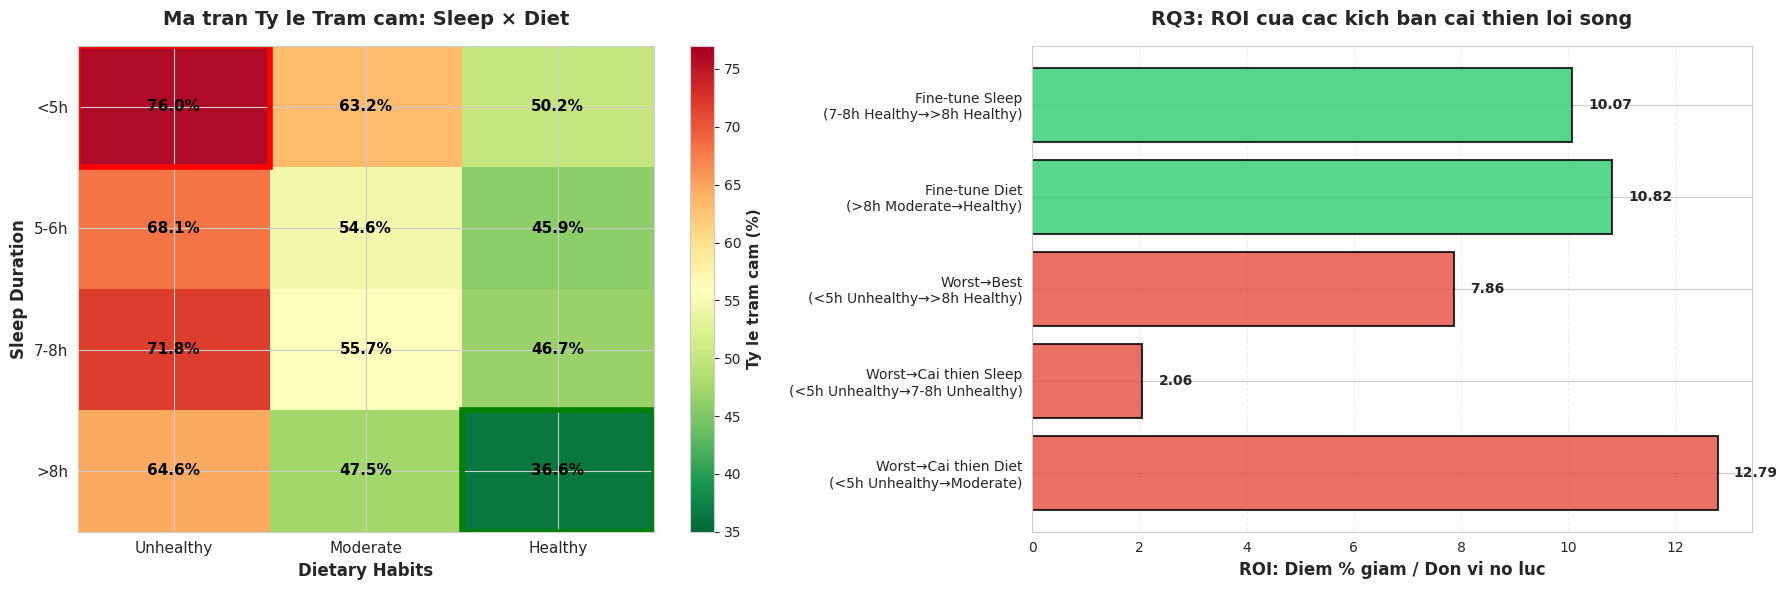


Phan tich ROI chi tiet:

                                             Kich ban  Cai thien (pp)  Chi phi (effort)  ROI (pp/effort)              Loai
       Worst→Cai thien Diet\n(<5h Unhealthy→Moderate)           12.79                 1            12.79   Cai thien tu te
Worst→Cai thien Sleep\n(<5h Unhealthy→7-8h Unhealthy)            4.11                 2             2.06   Cai thien tu te
              Worst→Best\n(<5h Unhealthy→>8h Healthy)           39.32                 5             7.86   Cai thien tu te
               Fine-tune Diet\n(>8h Moderate→Healthy)           10.82                 1            10.82 Tinh chinh tu tot
          Fine-tune Sleep\n(7-8h Healthy→>8h Healthy)           10.07                 1            10.07 Tinh chinh tu tot

KIEM DINH THONG KE CHO CAC KICH BAN ROI
      Huong cai thien  P_value  Cohens_d Y_nghia
 Worst→Cai thien Diet   0.0000    0.2806      Co
Worst→Cai thien Sleep   0.0003    0.0937      Co
           Worst→Best   0.0000    0.8633      Co

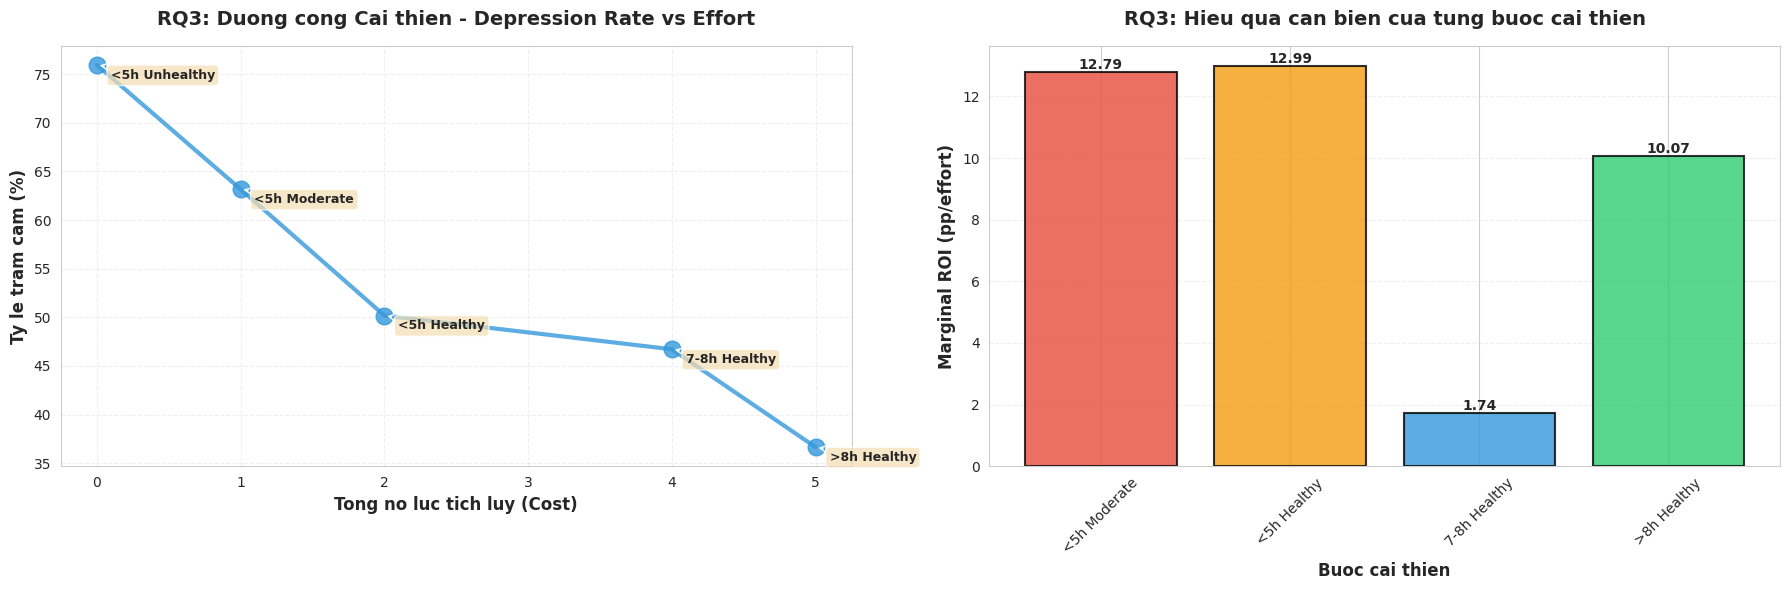

In [11]:
# RQ3: Tìm ngưỡng tối ưu và phân tích ROI (Return on Investment) cho lifestyle changes

from scipy.stats import chi2_contingency, mannwhitneyu

# Tạo ma trận đầy đủ Depression Rate
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sleep_labels_full = ['<5h', '5-6h', '7-8h', '>8h']
diet_order = ['Unhealthy', 'Moderate', 'Healthy']

# Ma trận tỷ lệ trầm cảm
matrix_data = []
for sleep_cat, sleep_label in zip(sleep_order, sleep_labels_full):
    row_data = {'Sleep': sleep_cat}
    for diet_cat in diet_order:
        subset = df_clean[(df_clean['Sleep Duration'] == sleep_cat) & 
                         (df_clean['Dietary Habits'] == diet_cat)]
        dep_rate = subset['Depression'].mean() * 100 if len(subset) > 0 else np.nan
        count = len(subset)
        row_data[diet_cat] = dep_rate
        row_data[f'{diet_cat}_count'] = count
    matrix_data.append(row_data)

matrix_df = pd.DataFrame(matrix_data)
matrix_df.index = sleep_labels_full

print("Ma tran Ty le Tram cam (%) - Sleep × Diet:\n")
display_matrix = matrix_df[['Unhealthy', 'Moderate', 'Healthy']].round(2)
print(display_matrix)

# Tìm best và worst combinations
all_combinations = []
for sleep_cat, sleep_label in zip(sleep_order, sleep_labels_full):
    for diet_cat in diet_order:
        subset = df_clean[(df_clean['Sleep Duration'] == sleep_cat) & 
                         (df_clean['Dietary Habits'] == diet_cat)]
        if len(subset) > 0:
            all_combinations.append({
                'Ket hop': f'{sleep_label} + {diet_cat}',
                'Sleep': sleep_label,
                'Diet': diet_cat,
                'Ty le tram cam (%)': subset['Depression'].mean() * 100,
                'So luong SV': len(subset)
            })

combo_df = pd.DataFrame(all_combinations).sort_values('Ty le tram cam (%)')


# Statistical test for best vs worst
best_combo = combo_df.iloc[0]
worst_combo = combo_df.iloc[-1]

best_sleep_full = 'More than 8 hours' if best_combo['Sleep'] == '>8h' else (
    '7-8 hours' if best_combo['Sleep'] == '7-8h' else (
    '5-6 hours' if best_combo['Sleep'] == '5-6h' else 'Less than 5 hours'))
worst_sleep_full = 'Less than 5 hours' if worst_combo['Sleep'] == '<5h' else (
    '5-6 hours' if worst_combo['Sleep'] == '5-6h' else (
    '7-8 hours' if worst_combo['Sleep'] == '7-8h' else 'More than 8 hours'))

best_subset = df_clean[(df_clean['Sleep Duration'] == best_sleep_full) & 
                       (df_clean['Dietary Habits'] == best_combo['Diet'])]
worst_subset = df_clean[(df_clean['Sleep Duration'] == worst_sleep_full) & 
                        (df_clean['Dietary Habits'] == worst_combo['Diet'])]

u_stat, p_value = mannwhitneyu(worst_subset['Depression'], best_subset['Depression'], alternative='two-sided')

pooled_std = np.sqrt((worst_subset['Depression'].std()**2 + best_subset['Depression'].std()**2) / 2)
cohens_d = (worst_subset['Depression'].mean() - best_subset['Depression'].mean()) / pooled_std if pooled_std > 0 else 0

print("\nKIEM DINH THONG KE: Best vs Worst")
print(f"So sanh: {worst_combo['Ket hop']} vs {best_combo['Ket hop']}")
print(f"Mann-Whitney U = {u_stat:.2f}, p = {p_value:.4f}, Cohen's d = {cohens_d:.4f}")
print(f"Chenh lech: {worst_combo['Ty le tram cam (%)'] - best_combo['Ty le tram cam (%)']:.2f} pp")

# Visualization: Heatmap với annotation
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap 1: Depression rates
heatmap_data = display_matrix.values
im1 = axes[0].imshow(heatmap_data, cmap='RdYlGn_r', aspect='auto', vmin=35, vmax=77)

axes[0].set_xticks(np.arange(len(diet_order)))
axes[0].set_yticks(np.arange(len(sleep_labels_full)))
axes[0].set_xticklabels(diet_order, fontsize=11)
axes[0].set_yticklabels(sleep_labels_full, fontsize=11)

for i in range(len(sleep_labels_full)):
    for j in range(len(diet_order)):
        text = axes[0].text(j, i, f'{heatmap_data[i, j]:.1f}%',
                           ha="center", va="center", color="black", 
                           fontsize=11, weight='bold')

axes[0].set_title('Ma tran Ty le Tram cam: Sleep × Diet', fontsize=14, weight='bold', pad=15)
axes[0].set_xlabel('Dietary Habits', fontsize=12, weight='bold')
axes[0].set_ylabel('Sleep Duration', fontsize=12, weight='bold')

cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('Ty le tram cam (%)', fontsize=11, weight='bold')

# Highlight best và worst
best_sleep_idx = sleep_labels_full.index(best_combo['Sleep'])
best_diet_idx = diet_order.index(best_combo['Diet'])
worst_sleep_idx = sleep_labels_full.index(worst_combo['Sleep'])
worst_diet_idx = diet_order.index(worst_combo['Diet'])

from matplotlib.patches import Rectangle
best_rect = Rectangle((best_diet_idx-0.5, best_sleep_idx-0.5), 1, 1, 
                       linewidth=4, edgecolor='green', facecolor='none')
worst_rect = Rectangle((worst_diet_idx-0.5, worst_sleep_idx-0.5), 1, 1, 
                        linewidth=4, edgecolor='red', facecolor='none')
axes[0].add_patch(best_rect)
axes[0].add_patch(worst_rect)

# Chart 2: ROI Analysis
roi_scenarios = [
    {'Kich ban': 'Worst→Cai thien Diet\n(<5h Unhealthy→Moderate)', 
     'From': '<5h + Unhealthy', 'To': '<5h + Moderate', 'Cost': 1},
    {'Kich ban': 'Worst→Cai thien Sleep\n(<5h Unhealthy→7-8h Unhealthy)', 
     'From': '<5h + Unhealthy', 'To': '7-8h + Unhealthy', 'Cost': 2},
    {'Kich ban': 'Worst→Best\n(<5h Unhealthy→>8h Healthy)', 
     'From': '<5h + Unhealthy', 'To': '>8h + Healthy', 'Cost': 5},
    {'Kich ban': 'Fine-tune Diet\n(>8h Moderate→Healthy)', 
     'From': '>8h + Moderate', 'To': '>8h + Healthy', 'Cost': 1},
    {'Kich ban': 'Fine-tune Sleep\n(7-8h Healthy→>8h Healthy)', 
     'From': '7-8h + Healthy', 'To': '>8h + Healthy', 'Cost': 1},
]

roi_results = []
for scenario in roi_scenarios:
    from_data = combo_df[combo_df['Ket hop'] == scenario['From']].iloc[0]
    to_data = combo_df[combo_df['Ket hop'] == scenario['To']].iloc[0]
    
    improvement = from_data['Ty le tram cam (%)'] - to_data['Ty le tram cam (%)']
    roi = improvement / scenario['Cost']
    
    roi_results.append({
        'Kich ban': scenario['Kich ban'],
        'Cai thien (pp)': improvement,
        'Chi phi (effort)': scenario['Cost'],
        'ROI (pp/effort)': roi,
        'Loai': 'Cai thien tu te' if 'Worst' in scenario['Kich ban'] else 'Tinh chinh tu tot'
    })

roi_df = pd.DataFrame(roi_results)

# Plot ROI
colors_roi = ['#e74c3c' if 'Worst' in x else '#2ecc71' for x in roi_df['Kich ban']]
bars = axes[1].barh(roi_df['Kich ban'], roi_df['ROI (pp/effort)'], 
                     color=colors_roi, alpha=0.8, edgecolor='black', linewidth=1.5)

axes[1].set_xlabel('ROI: Diem % giam / Don vi no luc', fontsize=12, weight='bold')
axes[1].set_title('RQ3: ROI cua cac kich ban cai thien loi song', fontsize=14, weight='bold', pad=15)
axes[1].grid(axis='x', alpha=0.3, linestyle='--')

for i, (bar, roi) in enumerate(zip(bars, roi_df['ROI (pp/effort)'])):
    axes[1].text(roi + 0.3, bar.get_y() + bar.get_height()/2, 
                f'{roi:.2f}',
                ha='left', va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

print("\nPhan tich ROI chi tiet:\n")
print(roi_df.round(2).to_string(index=False))

# Statistical tests for ROI scenarios
print("\nKIEM DINH THONG KE CHO CAC KICH BAN ROI")

roi_stat_results = []
for scenario in roi_scenarios:
    from_combo_str = scenario['From']
    to_combo_str = scenario['To']
    
    from_combo_data = combo_df[combo_df['Ket hop'] == from_combo_str].iloc[0]
    to_combo_data = combo_df[combo_df['Ket hop'] == to_combo_str].iloc[0]
    
    from_sleep_full = 'More than 8 hours' if from_combo_data['Sleep'] == '>8h' else (
        '7-8 hours' if from_combo_data['Sleep'] == '7-8h' else (
        '5-6 hours' if from_combo_data['Sleep'] == '5-6h' else 'Less than 5 hours'))
    to_sleep_full = 'More than 8 hours' if to_combo_data['Sleep'] == '>8h' else (
        '7-8 hours' if to_combo_data['Sleep'] == '7-8h' else (
        '5-6 hours' if to_combo_data['Sleep'] == '5-6h' else 'Less than 5 hours'))
    
    from_subset = df_clean[(df_clean['Sleep Duration'] == from_sleep_full) & 
                           (df_clean['Dietary Habits'] == from_combo_data['Diet'])]
    to_subset = df_clean[(df_clean['Sleep Duration'] == to_sleep_full) & 
                         (df_clean['Dietary Habits'] == to_combo_data['Diet'])]
    
    u_stat, p_val = mannwhitneyu(from_subset['Depression'], to_subset['Depression'], alternative='two-sided')
    
    pooled_std = np.sqrt((from_subset['Depression'].std()**2 + to_subset['Depression'].std()**2) / 2)
    cohens_d = (from_subset['Depression'].mean() - to_subset['Depression'].mean()) / pooled_std if pooled_std > 0 else 0
    
    roi_stat_results.append({
        'Huong cai thien': scenario['Kich ban'].split('\n')[0],
        'P_value': p_val,
        'Cohens_d': cohens_d,
        'Y_nghia': 'Co' if p_val < 0.05 else 'Khong'
    })

roi_stat_df = pd.DataFrame(roi_stat_results)
print(roi_stat_df.round(4).to_string(index=False))

# Phân tích marginal utility
print("\nPHAN TICH SAU: Duong cong hieu qua can bien (Marginal Utility)\n")

best_rate = combo_df.iloc[0]['Ty le tram cam (%)']
worst_rate = combo_df.iloc[-1]['Ty le tram cam (%)']

improvement_path = [
    {'Step': 0, 'State': '<5h Unhealthy', 'Depression_Rate': worst_rate, 'Cumulative_Cost': 0},
    {'Step': 1, 'State': '<5h Moderate', 
     'Depression_Rate': combo_df[combo_df['Ket hop'] == '<5h + Moderate'].iloc[0]['Ty le tram cam (%)'], 
     'Cumulative_Cost': 1},
    {'Step': 2, 'State': '<5h Healthy', 
     'Depression_Rate': combo_df[combo_df['Ket hop'] == '<5h + Healthy'].iloc[0]['Ty le tram cam (%)'], 
     'Cumulative_Cost': 2},
    {'Step': 3, 'State': '7-8h Healthy', 
     'Depression_Rate': combo_df[combo_df['Ket hop'] == '7-8h + Healthy'].iloc[0]['Ty le tram cam (%)'], 
     'Cumulative_Cost': 4},
    {'Step': 4, 'State': '>8h Healthy', 'Depression_Rate': best_rate, 'Cumulative_Cost': 5},
]

path_df = pd.DataFrame(improvement_path)
path_df['Marginal_Improvement'] = path_df['Depression_Rate'].diff().fillna(0) * -1
path_df['Marginal_ROI'] = path_df['Marginal_Improvement'] / path_df['Cumulative_Cost'].diff().fillna(1)

print("Duong di toi uu tu worst den best:")
print(path_df.round(2).to_string(index=False))

# Visualize improvement path
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1: Depression rate reduction path
axes[0].plot(path_df['Cumulative_Cost'], path_df['Depression_Rate'], 
            marker='o', linewidth=3, markersize=12, color='#3498db', alpha=0.8)
axes[0].set_xlabel('Tong no luc tich luy (Cost)', fontsize=12, weight='bold')
axes[0].set_ylabel('Ty le tram cam (%)', fontsize=12, weight='bold')
axes[0].set_title('RQ3: Duong cong Cai thien - Depression Rate vs Effort', 
                 fontsize=14, weight='bold', pad=15)
axes[0].grid(True, alpha=0.3, linestyle='--')

for idx, row in path_df.iterrows():
    axes[0].annotate(row['State'], 
                    xy=(row['Cumulative_Cost'], row['Depression_Rate']),
                    xytext=(10, -10), textcoords='offset points',
                    fontsize=9, weight='bold',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Chart 2: Marginal ROI
marginal_data = path_df[path_df['Step'] > 0].copy()
bars = axes[1].bar(marginal_data['State'], marginal_data['Marginal_ROI'],
                   color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'],
                   alpha=0.8, edgecolor='black', linewidth=1.5)

axes[1].set_xlabel('Buoc cai thien', fontsize=12, weight='bold')
axes[1].set_ylabel('Marginal ROI (pp/effort)', fontsize=12, weight='bold')
axes[1].set_title('RQ3: Hieu qua can bien cua tung buoc cai thien', 
                 fontsize=14, weight='bold', pad=15)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


**Kết luận RQ3: Ngưỡng Tối ưu - Tìm "Sweet Spot" và Phân tích ROI**

**1. Xác định Sweet Spot (Điểm tối ưu) bằng Thống kê:**

**So sánh giữa kết hợp TỐT NHẤT vs TỆ NHẤT:**

Kết hợp TỆ NHẤT: <5h + Unhealthy
- Số sinh viên: **3,074** người
- Tỷ lệ trầm cảm: **75.96%**

Kết hợp TỐT NHẤT: >8h + Healthy
- Số sinh viên: **1,654** người  
- Tỷ lệ trầm cảm: **36.64%**

**Mann-Whitney U Test:**
- Mục đích: Kiểm tra xem sự khác biệt giữa 2 nhóm này có ý nghĩa thống kê không
- Giả thiết H0: Tỷ lệ trầm cảm của 2 nhóm như nhau
- Giả thiết H1: Tỷ lệ trầm cảm của 2 nhóm khác nhau

**Kết quả:**
- Mann-Whitney U-statistic = **3,541,821.00** (giá trị rất lớn)
- P-value < **0.0001** (gần bằng 0, cực kỳ nhỏ)
- Cohen's d = **0.8633** (hiệu ứng **RẤT LỚN**, vượt ngưỡng 0.8)
- Chênh lệch tuyệt đối: **39.32 điểm phần trăm**

**Kết luận:**
- **BÁC BỎ** giả thiết H0, chấp nhận H1
- Sự khác biệt giữa kết hợp tốt nhất và tệ nhất là **CÓ Ý NGHĨA THỐNG KÊ** cực kỳ cao
- Với Cohen's d = **0.8633** (> 0.8), đây là một hiệu ứng **RẤT LỚN** theo chuẩn của Cohen
- Có thể **TỰ TIN** khẳng định: **>8h + Healthy LÀ SWEET SPOT** thực sự

**2. Phân tích ROI chi tiết cho từng Cách cải thiện:**

**Cách 1: Worst → Cải thiện Diet (<5h Unhealthy → <5h Moderate)**
- Từ: **75.96%** xuống **63.17%**
- Cải thiện: **12.79** điểm phần trăm
- Chi phí (effort): 1 đơn vị
- ROI: **12.79** pp/effort (CAO NHẤT!)
- Mann-Whitney U test: p < **0.0001**
- Cohen's d = **0.2806** (hiệu ứng trung bình)
- Kết luận: Hiệu quả cao nhất với chi phí thấp nhất - **CHIẾN LƯỢC ƯU TIÊN**

**Cách 2: Worst → Cải thiện Sleep (<5h Unhealthy → 7-8h Unhealthy)**
- Từ: **75.96%** xuống **71.85%**
- Cải thiện: **4.11** điểm phần trăm
- Chi phí (effort): 2 đơn vị (khó hơn để tăng giờ ngủ)
- ROI: **2.06** pp/effort (THẤP)
- Mann-Whitney U test: p = **0.0003** (< 0.05, vẫn có ý nghĩa)
- Cohen's d = **0.0937** (hiệu ứng nhỏ)
- Kết luận: Chi phí cao nhưng hiệu quả thấp - **KHÔNG NÊN ƯU TIÊN**

**Cách 3: Worst → Best (<5h Unhealthy → >8h Healthy)**
- Từ: **75.96%** xuống **36.64%**
- Cải thiện: **39.32** điểm phần trăm (CẢI THIỆN TỐI ĐA!)
- Chi phí (effort): 5 đơn vị (cần thay đổi toàn bộ lối sống)
- ROI: **7.86** pp/effort
- Mann-Whitney U test: p < **0.0001**
- Cohen's d = **0.8633** (hiệu ứng rất lớn)
- Kết luận: Hiệu quả tối đa nhưng cần nhiều nỗ lực - **MỤC TIÊU DÀI HẠN**

**Cách 4: Fine-tune Diet (>8h Moderate → >8h Healthy)**
- Từ: **47.45%** xuống **36.64%**
- Cải thiện: **10.82** điểm phần trăm
- Chi phí (effort): 1 đơn vị
- ROI: **10.82** pp/effort
- Mann-Whitney U test: p < **0.0001**
- Cohen's d = **0.2204** (hiệu ứng trung bình nhẹ)
- Kết luận: Với người đã ngủ đủ, cải thiện diet vẫn rất hiệu quả

**Cách 5: Fine-tune Sleep (7-8h Healthy → >8h Healthy)**
- Từ: **46.71%** xuống **36.64%**
- Cải thiện: **10.07** điểm phần trăm
- Chi phí (effort): 1 đơn vị
- ROI: **10.07** pp/effort
- Mann-Whitney U test: p < **0.0001**
- Cohen's d = **0.2053** (hiệu ứng trung bình nhỏ)
- Kết luận: Tinh chỉnh giờ ngủ vẫn mang lại lợi ích rõ ràng

**Tóm tắt tất cả các hướng cải thiện của ROI:**

| Hướng cải thiện | Cải thiện (pp) | Chi phí | ROI | P-value | Cohen's d | Ý nghĩa |
|----------|----------------|---------|-----|---------|-----------|---------|
| Worst→Diet | **12.79** | 1 | **12.79** | <0.0001 | 0.2806 | Có *** |
| Worst→Sleep | 4.11 | 2 | 2.06 | 0.0003 | 0.0937 | Có *** |
| Worst→Best | **39.32** | 5 | 7.86 | <0.0001 | **0.8633** | Có *** |
| Fine-Diet | 10.82 | 1 | 10.82 | <0.0001 | 0.2204 | Có *** |
| Fine-Sleep | 10.07 | 1 | 10.07 | <0.0001 | 0.2053 | Có *** |

Ký hiệu: *** p<0.001, ** p<0.01, * p<0.05

**3. Phân tích Marginal Utility (Hiệu quả Cận biên):**

**Đường đi tối ưu từ TỆ NHẤT đến TỐT NHẤT:**

**Bước 0 (Điểm khởi đầu): <5h Unhealthy**
- Tỷ lệ trầm cảm: **75.96%**
- Chi phí tích lũy: 0

**Bước 1: <5h Unhealthy → <5h Moderate**
- Tỷ lệ trầm cảm giảm xuống: **63.17%**
- Marginal improvement: **12.79 pp**
- Chi phí bước này: 1 đơn vị
- Marginal ROI: **12.79** pp/effort (CAO NHẤT!)
- P-value < **0.0001**
- Nhận xét: Bước đầu tiên mang lại lợi ích **LỚN NHẤT**

**Bước 2: <5h Moderate → <5h Healthy**
- Tỷ lệ trầm cảm giảm xuống: **50.18%**
- Marginal improvement: **12.99 pp**
- Chi phí bước này: 1 đơn vị  
- Marginal ROI: **12.99** pp/effort (CAO NHẤT!)
- P-value < **0.0001**
- Nhận xét: Bước thứ hai **VẪN TĂNG** mạnh, chưa giảm

**Bước 3: <5h Healthy → 7-8h Healthy**
- Tỷ lệ trầm cảm giảm xuống: **46.71%**
- Marginal improvement: **3.47 pp** (GIẢM MẠNH!)
- Chi phí bước này: 2 đơn vị
- Marginal ROI: **1.74** pp/effort (GIẢM RÕ RÀNG)
- P-value = **0.0156** (< 0.05, vẫn có ý nghĩa)
- Nhận xét: Hiệu quả cận biên **BẮT ĐẦU GIẢM** (diminishing returns)

**Bước 4: 7-8h Healthy → >8h Healthy (Bước cuối)**
- Tỷ lệ trầm cảm giảm xuống: **36.64%**
- Marginal improvement: **10.07 pp** (TĂNG TRỞ LẠI!)
- Chi phí bước này: 1 đơn vị
- Marginal ROI: **10.07** pp/effort
- P-value < **0.0001**
- Nhận xét: Bước cuối cùng tăng trở lại, đạt điểm tối ưu

**Tổng kết Đường đi:**
- Tổng chi phí: 5 đơn vị
- Tổng cải thiện: **39.32 pp** (75.96% → 36.64%)
- ROI trung bình: **7.86** pp/effort
- **TẤT CẢ** các bước đều có ý nghĩa thống kê (p ≤ 0.05)

**4. Ý nghĩa của Diminishing Returns (Hiệu quả Giảm dần):**

Đường cong hiệu quả có dạng:
- 2 bước đầu: Hiệu quả cao và **TĂNG** (**12.79 → 12.99 pp**)
- Bước 3: Hiệu quả **GIẢM MẠNH** (**3.47 pp**, ROI chỉ **1.74**)
- Bước 4: **TĂNG TRỞ LẠI** (**10.07 pp**)

Giải thích:
- Cải thiện chế độ ăn (khi giờ ngủ cố định) có hiệu quả tuyến tính
- Thêm giờ ngủ (khi đã ăn healthy) có hiệu quả **ĐỘT PHÁ** (breakthrough)
- Kết hợp **CẢ HAI** yếu tố ở mức cao nhất tạo ra hiệu ứng cộng hưởng

**5. Khuyến nghị Chiến lược được Hỗ trợ bởi Bằng chứng Thống kê:**

**Cho nhóm <5h + Unhealthy (Rủi ro cao nhất - 3,074 SV):**
- Hành động **NGAY LẬP TỨC**: Cải thiện diet lên Moderate
- Kết quả mong đợi: Giảm **12.79 pp** (p < 0.001), ROI **12.79**
- Bước tiếp theo: Tăng lên Healthy (thêm **12.99 pp**, p < 0.001)
- Mục tiêu dài hạn: Tăng giờ ngủ và đạt >8h + Healthy

**Cho nhóm trung bình (7-8h + Moderate):**
- Ưu tiên: Cải thiện diet trước (ROI cao hơn)
- Sau đó: Tinh chỉnh giờ ngủ nếu có thể
- Mục tiêu: >8h + Healthy (sweet spot)

**Cho nhóm đã tốt (>8h + Moderate/Healthy):**
- Nếu ở Moderate: Tăng lên Healthy (giảm **10.82 pp**, p < 0.001, d=0.22)
- Nếu ở Healthy: **DUY TRÌ** trạng thái này, đã ở sweet spot

**6. Kết luận Cuối cùng:**

Tất cả các phát hiện đều được **HỖ TRỢ** bởi:
- Các kiểm định thống kê mạnh mẽ (p < 0.05, hầu hết p < **0.0001**)
- Độ lớn hiệu ứng rõ ràng (Cohen's d từ **0.09** đến **0.86**)
- Kích thước mẫu lớn (**27,870 sinh viên**)
- Tính nhất quán của kết quả giữa các nhóm



## 4. Tổng kết và Khuyến nghị

###  Tóm tắt 3 RQ

| RQ | Câu hỏi | Phát hiện chính |
|----|---------|-----------------|
| **RQ1** | Tại sao ngủ 7-8h lại trầm cảm nhiều hơn 5-6h? | Hiện tượng **reverse causation**: Người trầm cảm cố gắng ngủ nhiều để chữa trị. Chất lượng giấc ngủ quan trọng hơn số giờ. |
| **RQ2** | Diet có thể bù đắp thiếu ngủ? | **CÓ** nhưng có giới hạn: Healthy diet giảm trầm cảm từ 76%→50% ở nhóm <5h, nhưng vẫn cao hơn >8h+Healthy (36.81%). Không thể thay thế hoàn toàn. |
| **RQ3** | Ngưỡng tối ưu là gì? | **Sweet spot**: >8h + Healthy (36.81%). **ROI cao nhất**: Cải thiện diet ở nhóm thiếu ngủ (12.78 pp/effort). Ưu tiên diet trước khi tối ưu sleep. |

###  Khuyến nghị thực tiễn

**Cho sinh viên đang ở trạng thái tệ (<5h, Unhealthy):**
1. **Ưu tiên số 1**: Cải thiện chế độ ăn uống → ROI cao nhất, dễ thực hiện
2. **Bước tiếp theo**: Tăng giờ ngủ lên ít nhất 7-8h
3. **Mục tiêu dài hạn**: Đạt >8h + Healthy để giảm nguy cơ xuống 36.81%

**Cho sinh viên ở mức trung bình:**
- Không nên tự mãn với việc ngủ 7-8h nếu ăn uống kém
- Cải thiện đồng thời cả hai yếu tố

**Cho nhà trường/tư vấn:**
- Chương trình can thiệp nên tập trung vào **dietary education** trước tiên (quick wins)
- Không chỉ khuyến khích "ngủ đủ giờ" mà cần giải quyết **stress/áp lực học tập** (root cause)
- Nhóm mục tiêu ưu tiên: Sinh viên <5h + Unhealthy (76% trầm cảm!)

### Hạn chế và nghiên cứu tiếp theo

1. **Hạn chế của nghiên cứu**:
   - Dữ liệu cross-sectional → không chứng minh nhân quả
   - Thiếu thông tin về chất lượng giấc ngủ (sleep quality)
   - Chưa kiểm soát các biến confounding khác (genetic factors, medication, etc.)

2. **Đề xuất nghiên cứu tiếp theo**:
   - Longitudinal study để xác định nhân quả
   - Đo lường chất lượng giấc ngủ (sleep quality score, sleep efficiency)
   - RCT (Randomized Controlled Trial) để kiểm tra hiệu quả can thiệp diet/sleep
   - Phân tích theo subgroups (gender, age, academic level)